<div align="center">

<b><h1><u>Predicting Customer Churn for a Bank Using Machine Learning</u></h1></b>

</div>

### **Project Overview**
Customer churn prediction is crucial for banks to maintain their customer base and plan retention strategies effectively. This project involves cleaning and preprocessing a bank's customer dataset, performing exploratory data analysis (EDA), and building a machine learning model to predict customer churn. The dataset contains information about various customers and whether they have churned. Our goal is to develop a predictive model that can identify customers at risk of churning.




#### 2. Handling Duplicates
We will identify and remove duplicate records to ensure data integrity.

#### 3. Outlier Treatment
Outliers can skew the data analysis and model performance. We will identify outliers and apply appropriate techniques to handle them.

#### 4. Missing Values
Handling missing values is crucial for accurate data analysis. We will identify missing values and impute them using appropriate methods.

#### 5. Categorical Variable Transformation
We will transform categorical variables into numerical values using suitable encoding techniques to make them usable for machine learning algorithms.

#### 6. Feature Scaling
Scaling the dataset ensures that features are on a similar scale, which is important for many machine learning algorithms.

### Part B: Data Visualization

#### 1. Churn Rate Analysis
We will visualize the average churn rate by geography, gender, and tenure to understand the patterns in the data.

#### 2. Distribution Analysis
Visualizing the distribution of features such as geography, age, and credit score helps in understanding the data distribution and identifying any skewness.

#### 3. Combining Visualizations
We will combine the above visualizations into a single subplot for a comprehensive view.

#### 4. Correlation Analysis
We will create a correlation matrix to show how each variable correlates with the target variable (Exited). We will also visualize the correlation between each feature and the target variable using a bar chart.

### Part C: Machine Learning

#### 1. Model Selection and Training
We will select appropriate machine learning algorithms (e.g., logistic regression, decision tree, random forest), split the dataset into training and testing sets, and train the selected models on the training set.

#### 2. Model Evaluation and Prediction
We will evaluate the models using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) and select the best-performing model. We will then use the trained model to predict customer churn on the testing set and analyze the results.

### Part D: Interactive Dashboard

#### Setting up the Dashboard
We will use Plotly Dash to create an interactive dashboard that allows users to explore the data and the results of our analysis.

```python
# Import required libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Churn Dashboard", style={'textAlign': 'center'}),
    
    dcc.Tabs([
        dcc.Tab(label='Churn Rate Analysis', children=[
            html.Div([
                dcc.Graph(id='churn-rate-geo'),
                dcc.Graph(id='churn-rate-gender'),
                dcc.Graph(id='churn-rate-tenure')
            ])
        ]),
        dcc.Tab(label='Distribution Analysis', children=[
            html.Div([
                dcc.Graph(id='dist-geo'),
                dcc.Graph(id='dist-age'),
                dcc.Graph(id='dist-credit-score')
            ])
        ]),
        dcc.Tab(label='Correlation Analysis', children=[
            html.Div([
                dcc.Graph(id='corr-matrix'),
                dcc.Graph(id='corr-target')
            ])
        ])
    ])
])

# Define the callback to update the churn rate graphs
@app.callback(
    [Output('churn-rate-geo', 'figure'),
     Output('churn-rate-gender', 'figure'),
     Output('churn-rate-tenure', 'figure')],
    Input('tabs', 'value')
)
def update_churn_rate_analysis(tab):
    if tab == 'Churn Rate Analysis':
        fig_geo = px.bar(df, x='Geography', y='Exited', title='Churn Rate by Geography')
        fig_gender = px.bar(df, x='Gender', y='Exited', title='Churn Rate by Gender')
        fig_tenure = px.bar(df, x='Tenure', y='Exited', title='Churn Rate by Tenure')
        return fig_geo, fig_gender, fig_tenure

# Define the callback to update the distribution graphs
@app.callback(
    [Output('dist-geo', 'figure'),
     Output('dist-age', 'figure'),
     Output('dist-credit-score', 'figure')],
    Input('tabs', 'value')
)
def update_distribution_analysis(tab):
    if tab == 'Distribution Analysis':
        fig_geo = px.histogram(df, x='Geography', title='Distribution of Geography')
        fig_age = px.histogram(df, x='Age', title='Distribution of Age')
        fig_credit = px.histogram(df, x='CreditScore', title='Distribution of Credit Score')
        return fig_geo, fig_age, fig_credit

# Define the callback to update the correlation graphs
@app.callback(
    [Output('corr-matrix', 'figure'),
     Output('corr-target', 'figure')],
    Input('tabs', 'value')
)
def update_correlation_analysis(tab):
    if tab == 'Correlation Analysis':
        corr_matrix = df.corr()
        fig_corr_matrix = px.imshow(corr_matrix, title='Correlation Matrix', aspect='auto')
        target_corr = corr_matrix['Exited'].sort_values(ascending=False)
        fig_corr_target = px.bar(x=target_corr.index, y=target_corr.values, title='Correlation with Target')
        return fig_corr_matrix, fig_corr_target

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

### Part A: Data Preprocessing

#### 1. Uni-variate Analysis

In this step, we will determine the type of each feature (categorical or continuous), calculate the mean, median, and quantiles for continuous variables, and create histograms or frequency tables for categorical variables.

In [355]:
# Let's import the libraries
import numpy as np
import pandas as pd
import sweetviz as sv # analysis report

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()  # This should be on a separate line
import plotly.io as pio
pio.templates.default = "plotly_white"
pd.options.plotting.backend = "plotly"

# Extra imports out of curiosity
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import Markdown for better aesthetics
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
import seaborn as sns



In [356]:
# Define the file path
file_path = r'C:\Users\donna\OneDrive\Documents\GitHub\Portfolio\Predicting Customer Churn for a Bank Using Machine Learning\Original_data\churn_data_before_processing.csv'

# Read the CSV file
churn = pd.read_csv(file_path)

# Display the first few rows of the dataframe
churn.head()


Unnamed: 0  RowNumber  CustomerId   Surname  CreditScore Geography  Gender  \
0           0          1    15634602  Hargrave        619.0    France  Female   
1           1          2    15647311      Hill        608.0     Spain  Female   
2           2          3    15619304      Onio        502.0    France  Female   
3           3          4    15701354      Boni        699.0    France  Female   
4           4          5    15737888  Mitchell        850.0     Spain  Female   

    Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  42.0     2.0       0.00            1.0        1.0             1.0   
1  41.0     1.0   83807.86            1.0        0.0             1.0   
2  42.0     8.0  159660.80            3.0        1.0             0.0   
3  39.0     1.0       0.00            2.0        0.0             NaN   
4  43.0     2.0  125510.82            1.0        1.0             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [357]:
# Get rid of the unnamed column
churn = churn.drop(columns='Unnamed: 0')


In [358]:
churn

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0              1    15634602  Hargrave        619.0    France  Female  42.0   
1              2    15647311      Hill        608.0     Spain  Female  41.0   
2              3    15619304      Onio        502.0    France  Female  42.0   
3              4    15701354      Boni        699.0    France  Female  39.0   
4              5    15737888  Mitchell        850.0     Spain  Female  43.0   
...          ...         ...       ...          ...       ...     ...   ...   
10145       3613    15792151  Hamilton        635.0     Spain  Female  37.0   
10146       4438    15779522    Efimov        736.0    France  Female  24.0   
10147       6550    15792029       Lee        620.0    France    Male  32.0   
10148       4591    15680167   Thomson        635.0    France  Female  78.0   
10149          9    15792365        He        501.0    France    Male  44.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0         2.0       0.00            1.0        1.0             1.0   
1         1.0   83807.86            1.0        0.0             1.0   
2         8.0  159660.80            3.0        1.0             0.0   
3         1.0       0.00            2.0        0.0             NaN   
4         2.0  125510.82            1.0        1.0             1.0   
...       ...        ...            ...        ...             ...   
10145     3.0       0.00            2.0        1.0             0.0   
10146     0.0       0.00            2.0        1.0             0.0   
10147     6.0       0.00            2.0        1.0             0.0   
10148     6.0   47536.40            1.0        NaN             1.0   
10149     4.0  142051.07            2.0        0.0             1.0   

       EstimatedSalary  Exited  
0            101348.88       1  
1            112542.58       0  
2            113931.57       1  
3             93826.63       0  
4             79084.10       0  
...                ...     ...  
10145         91086.73       0  
10146        109355.73       1  
10147         56139.09       0  
10148        119400.08       0  
10149         74940.50       0  

[10150 rows x 14 columns]

In [359]:
churn.shape

(10150, 14)

In [360]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [361]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10056 non-null  object 
 3   CreditScore      10132 non-null  float64
 4   Geography        9954 non-null   object 
 5   Gender           9867 non-null   object 
 6   Age              9879 non-null   float64
 7   Tenure           10070 non-null  float64
 8   Balance          9994 non-null   float64
 9   NumOfProducts    9862 non-null   float64
 10  HasCrCard        10067 non-null  float64
 11  IsActiveMember   10063 non-null  float64
 12  EstimatedSalary  10106 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


                                             |          | [  0%]   00:00 -> (? left)


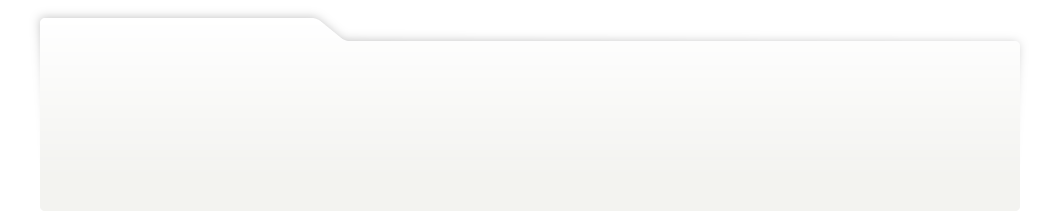
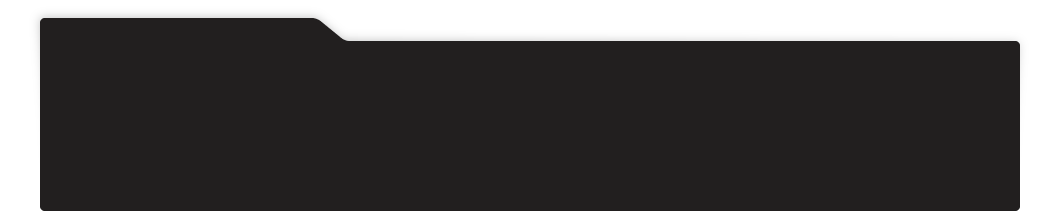
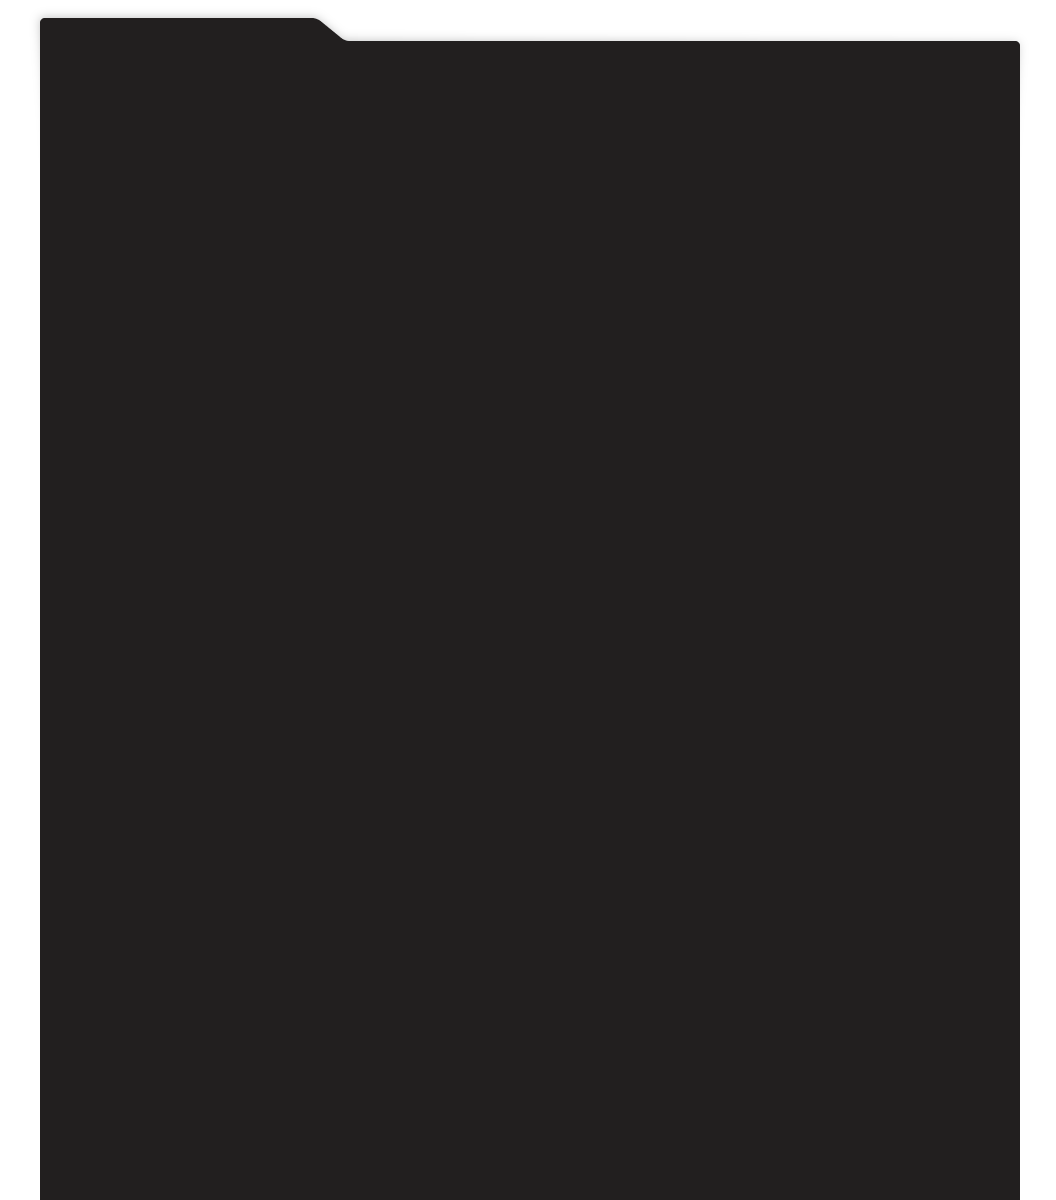
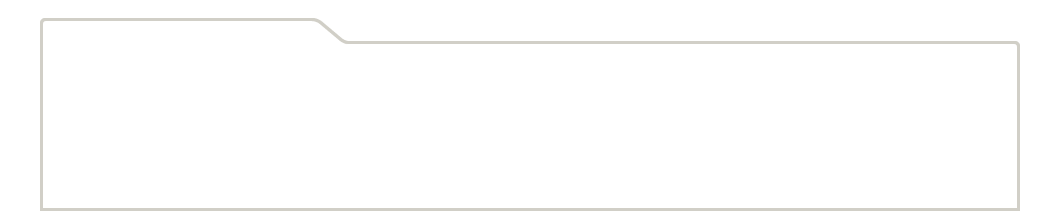
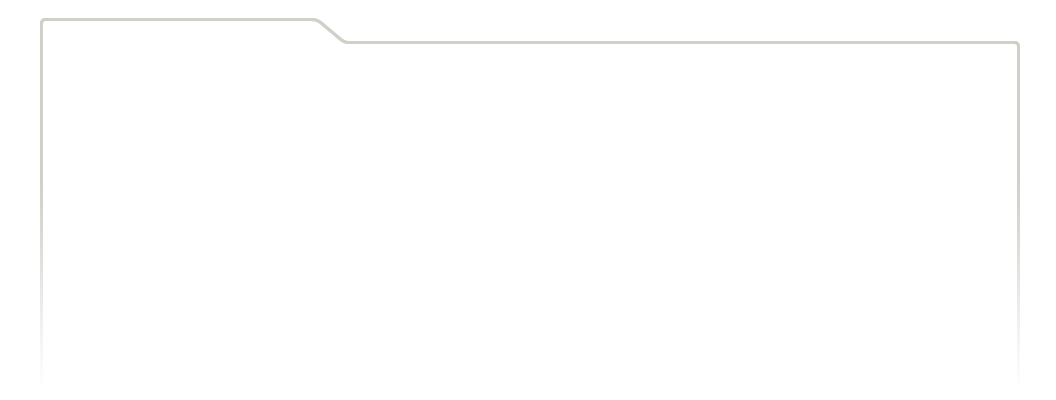
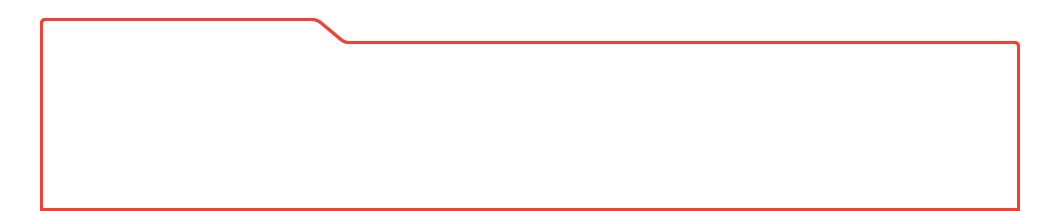
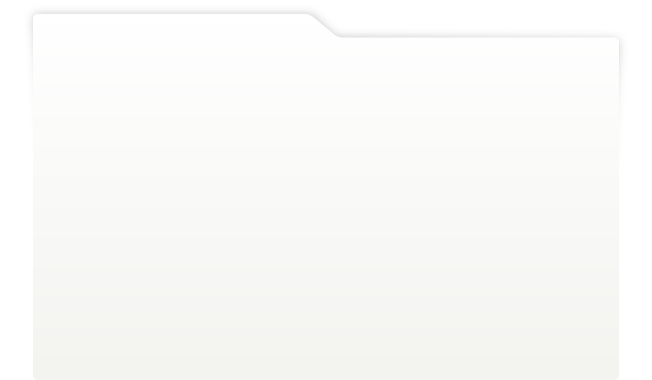
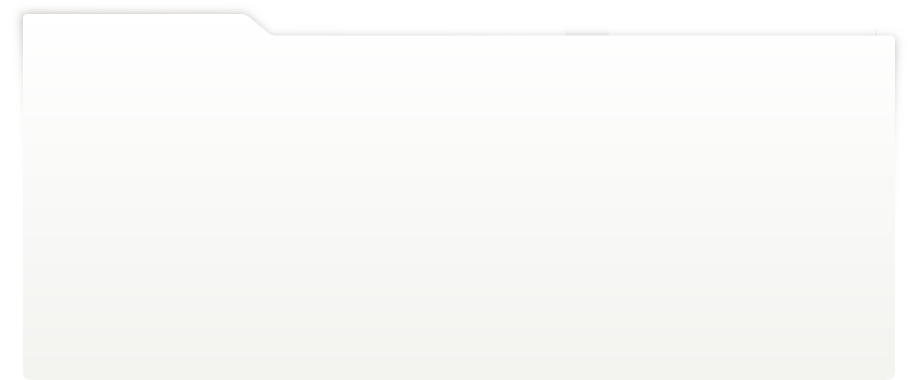
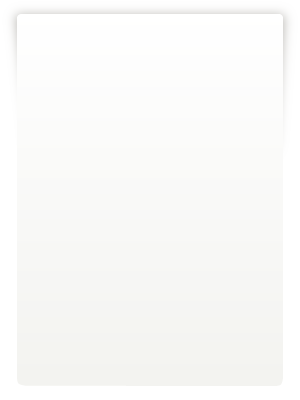
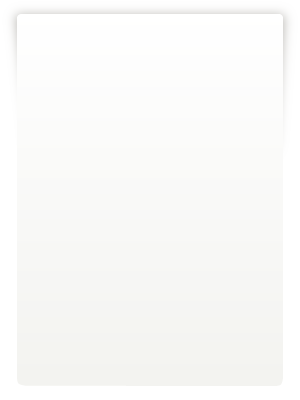
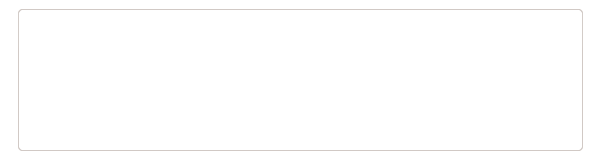
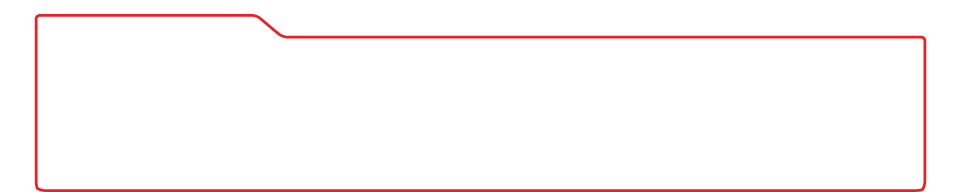
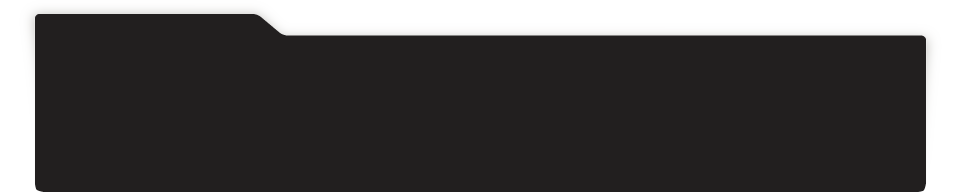
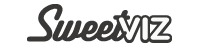
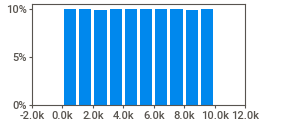
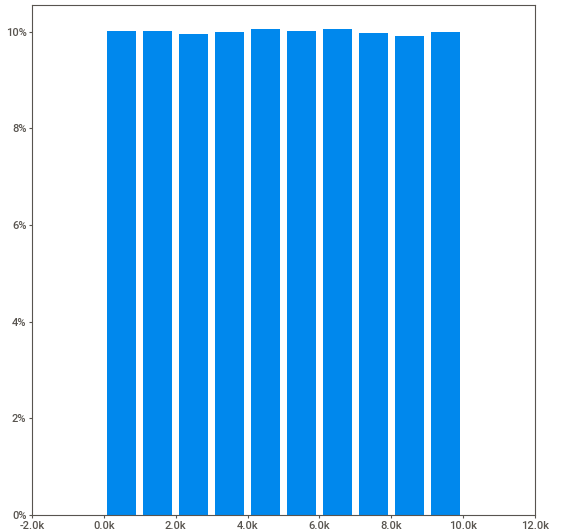
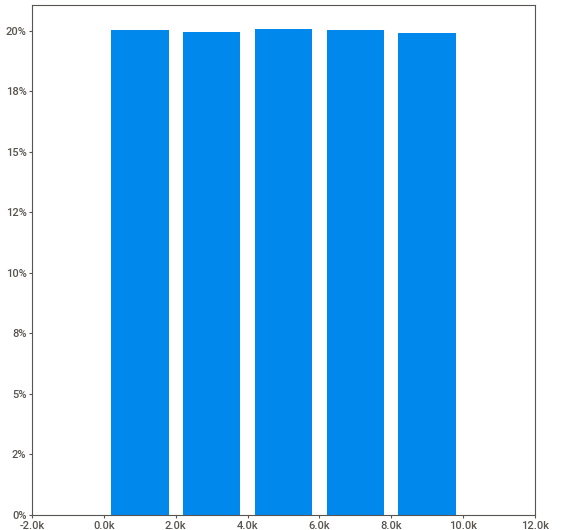
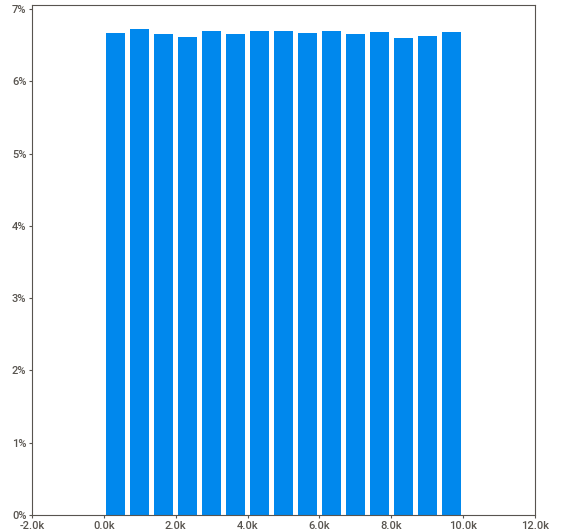
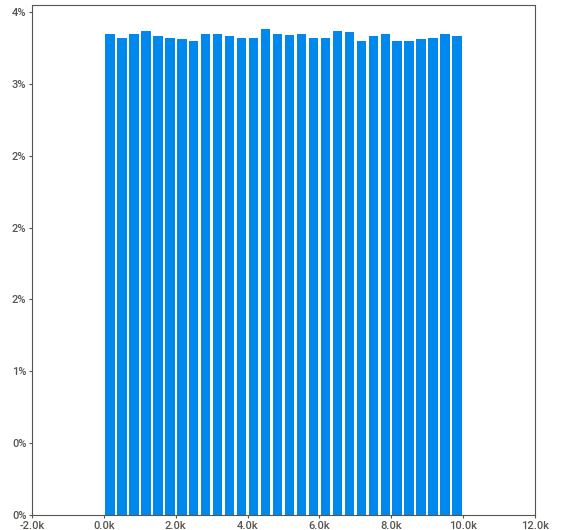
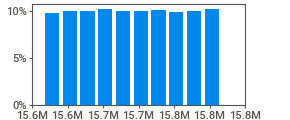
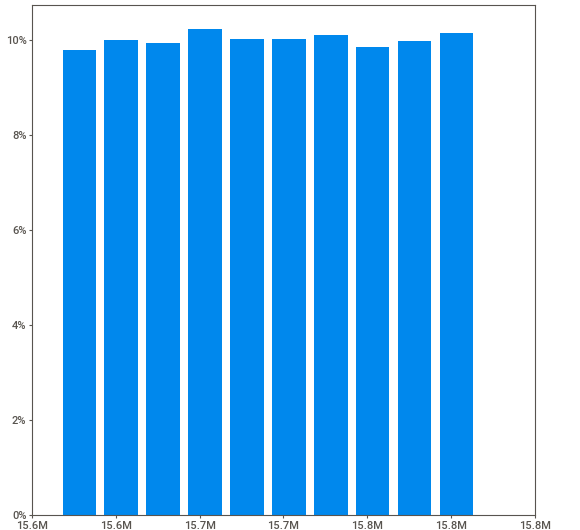
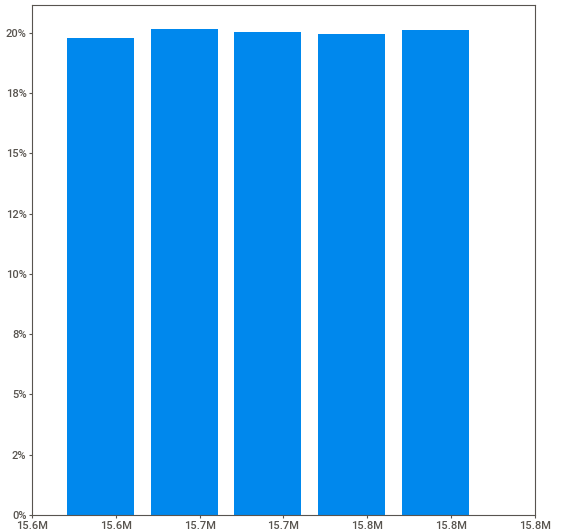
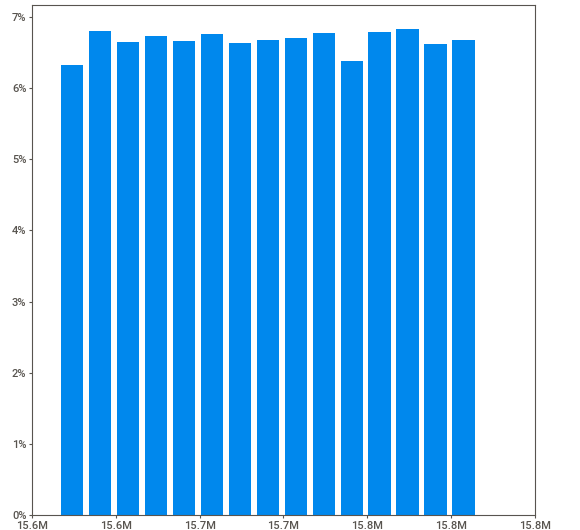
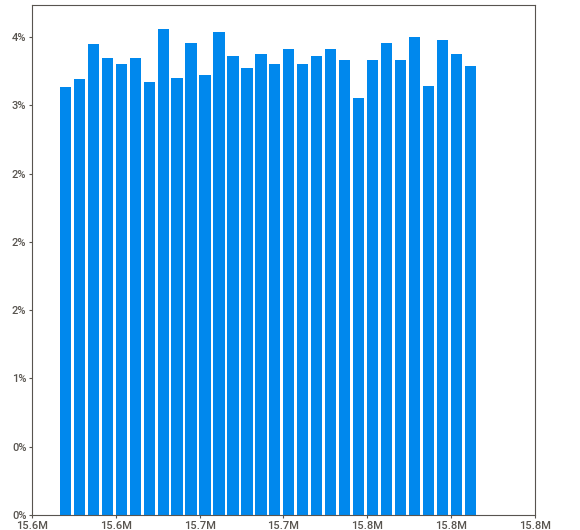
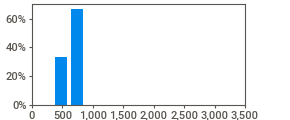
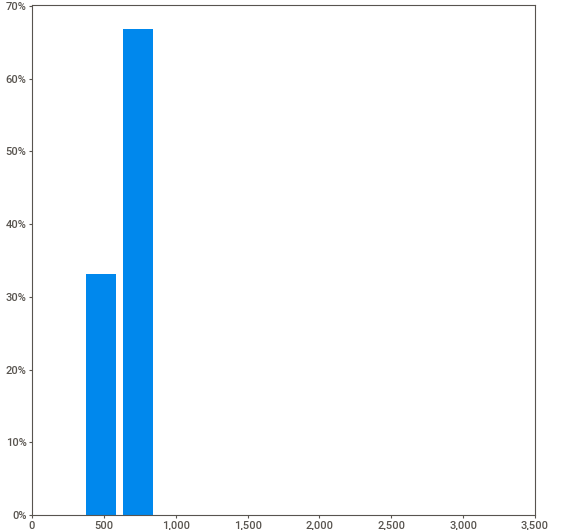
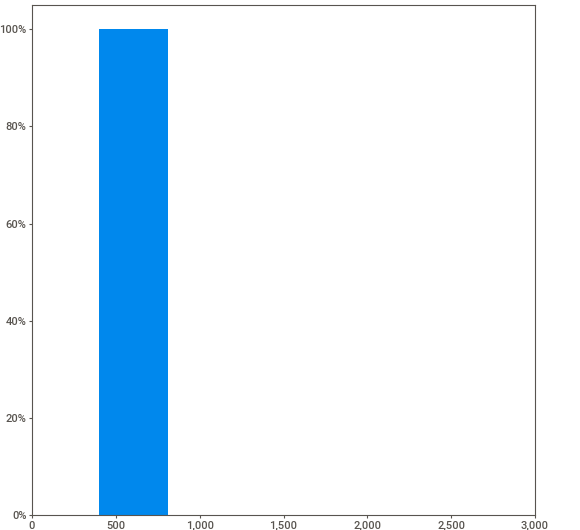
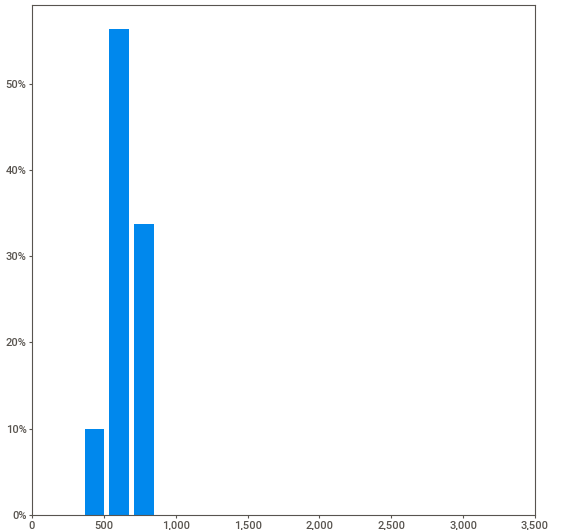
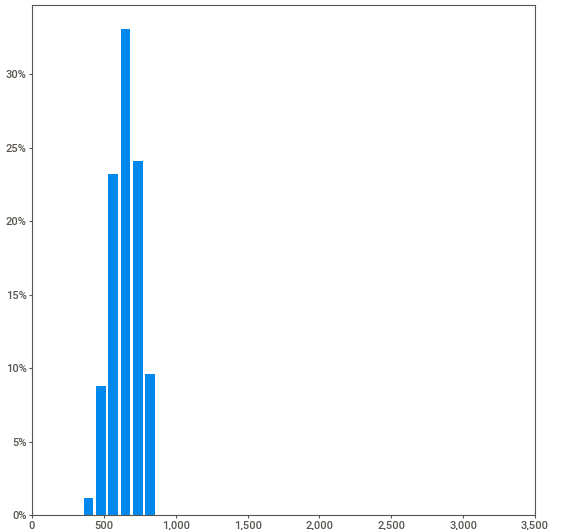
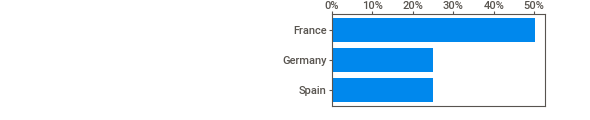
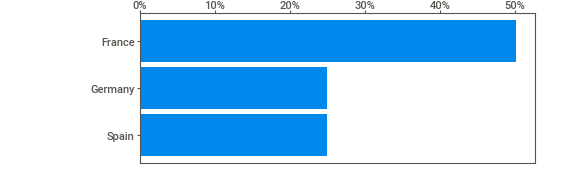
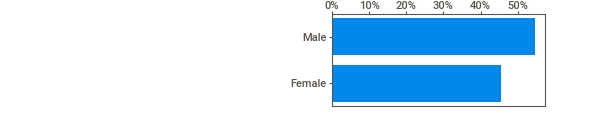
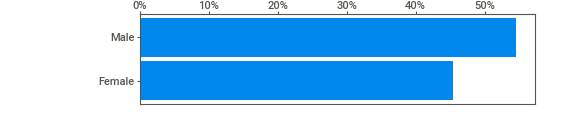
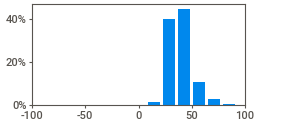
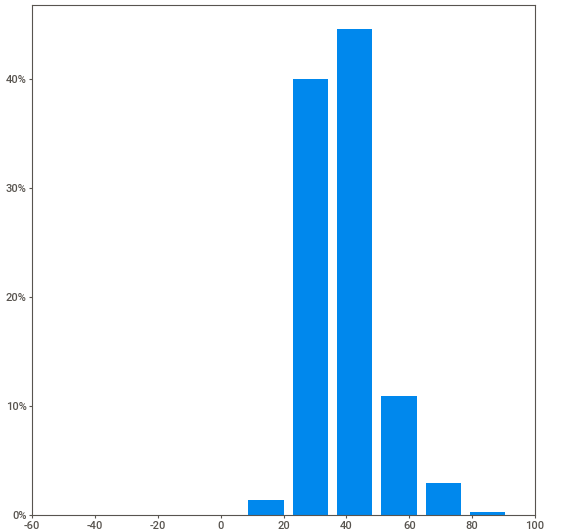
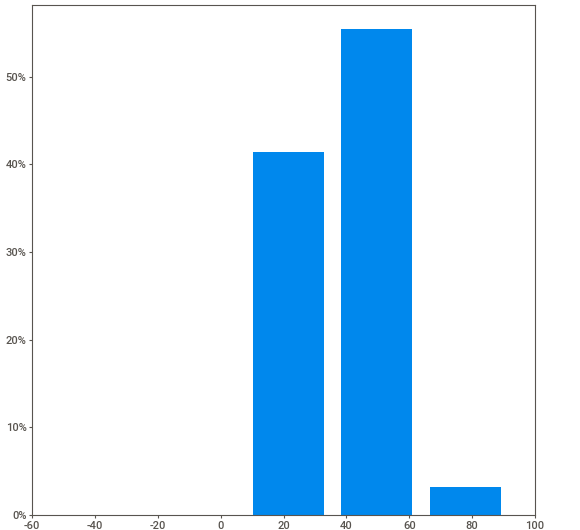
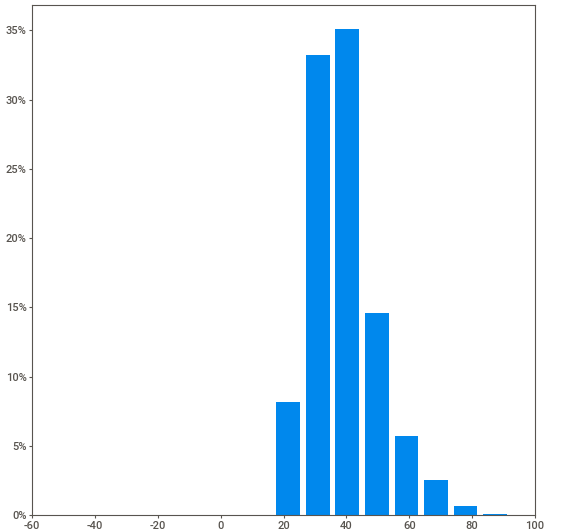
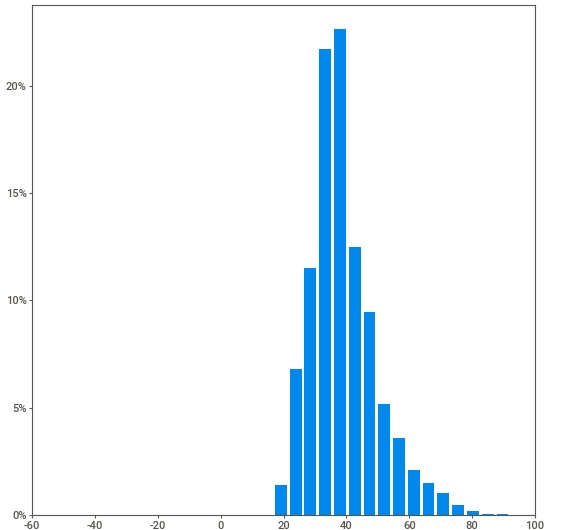
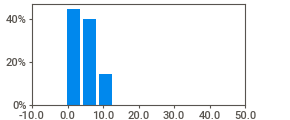
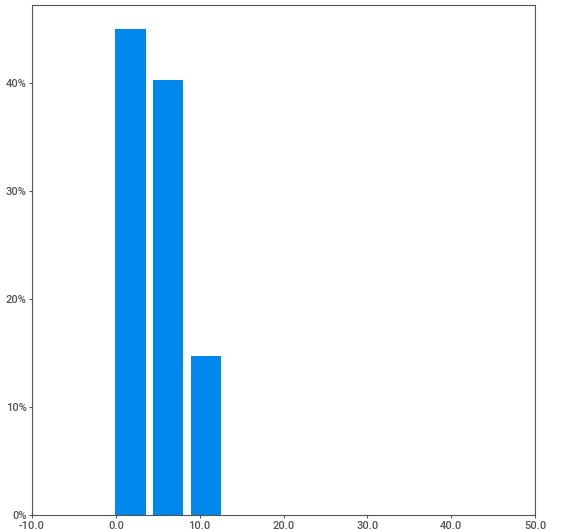
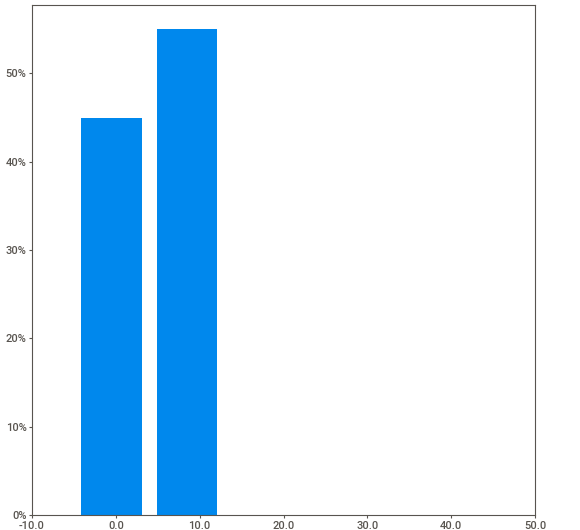
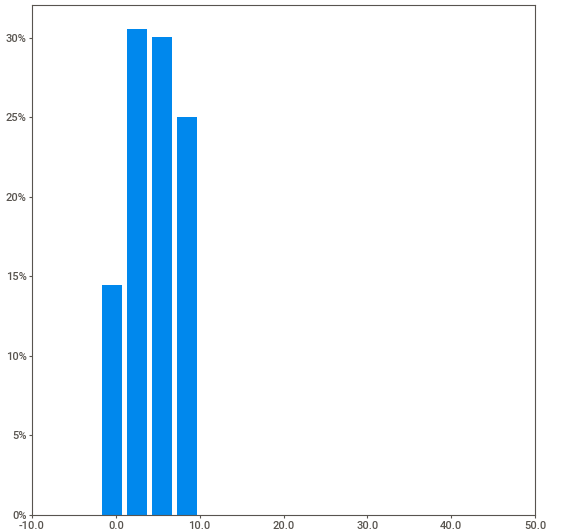
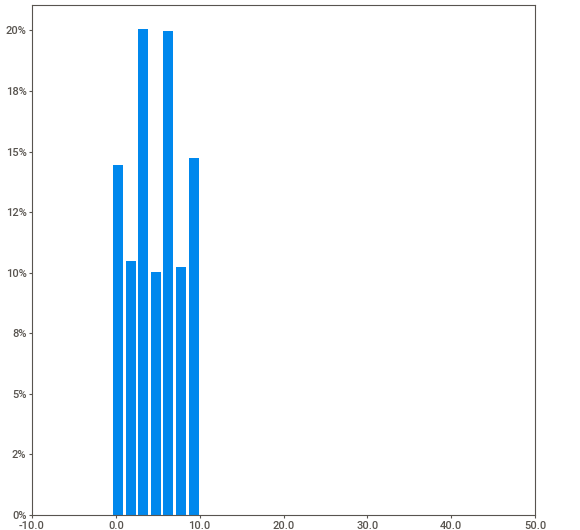
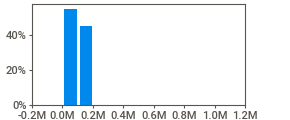
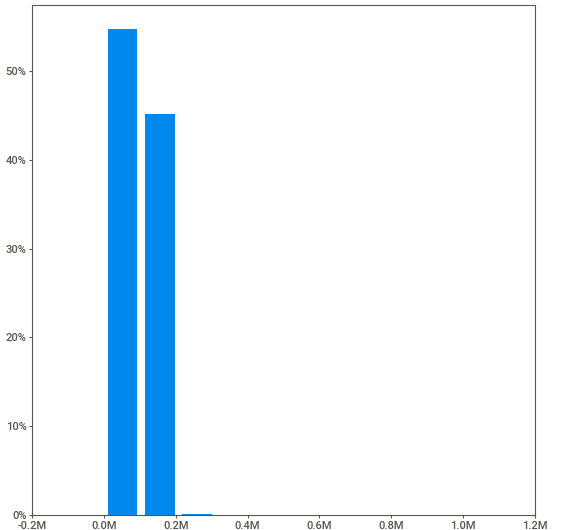
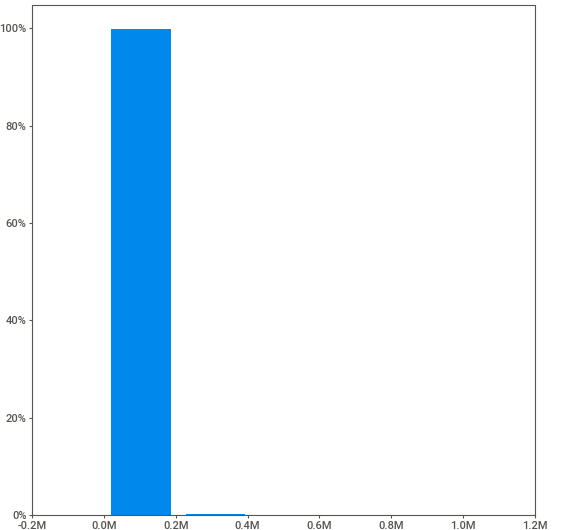
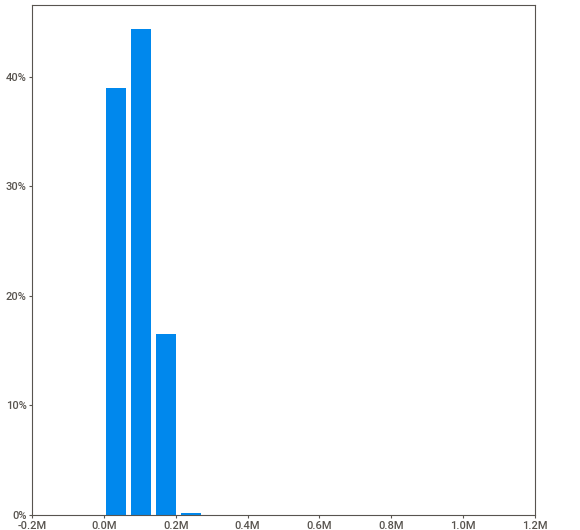
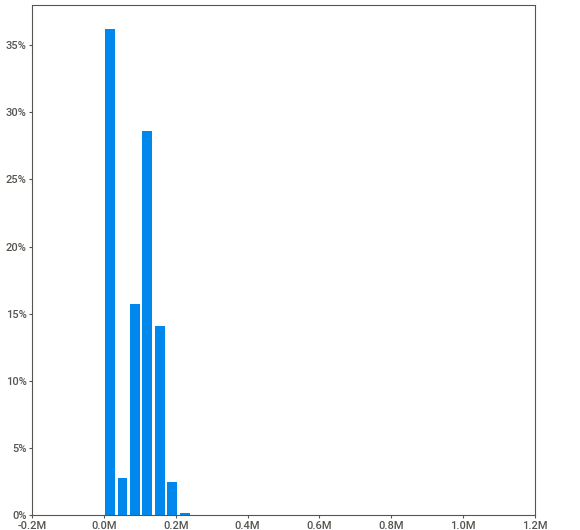
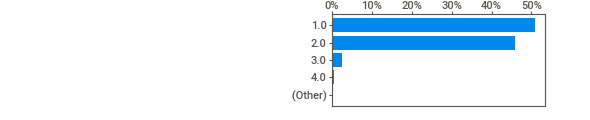
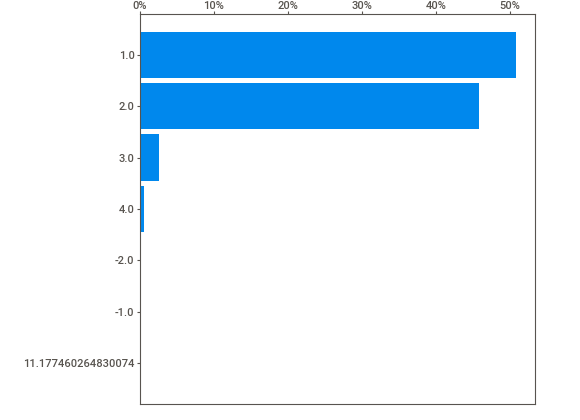
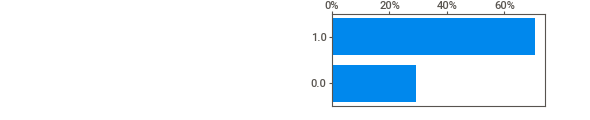
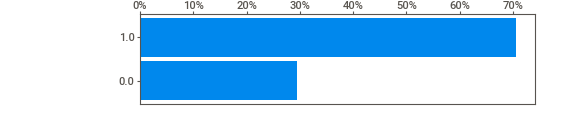
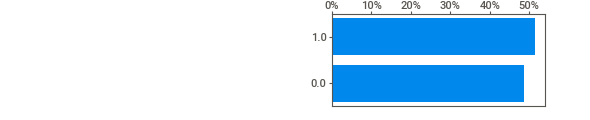
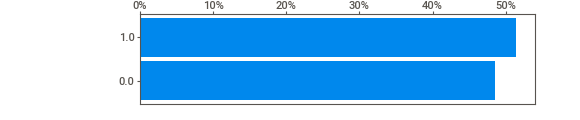
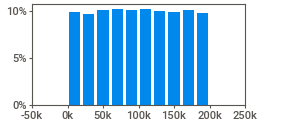
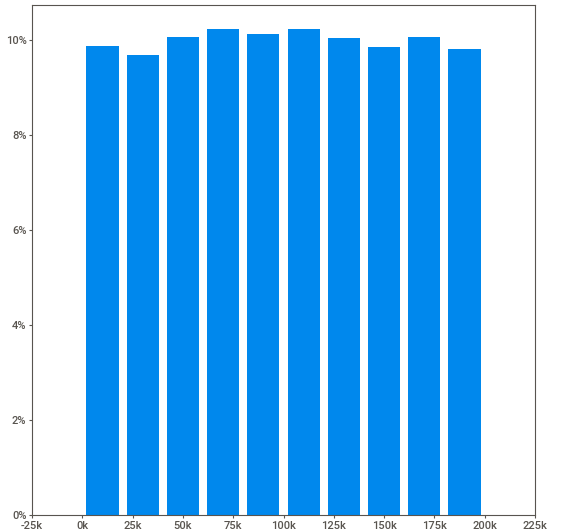
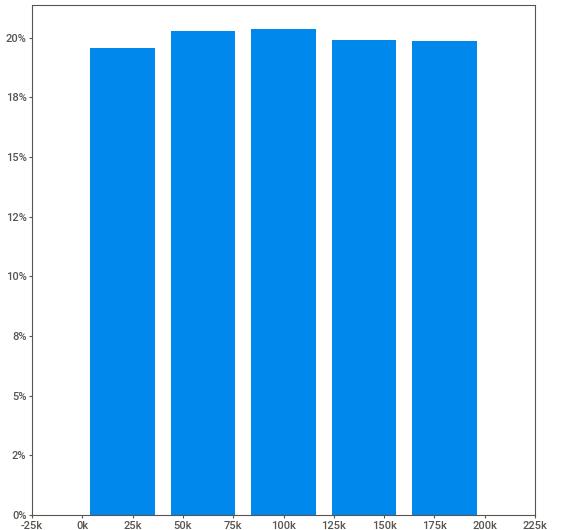
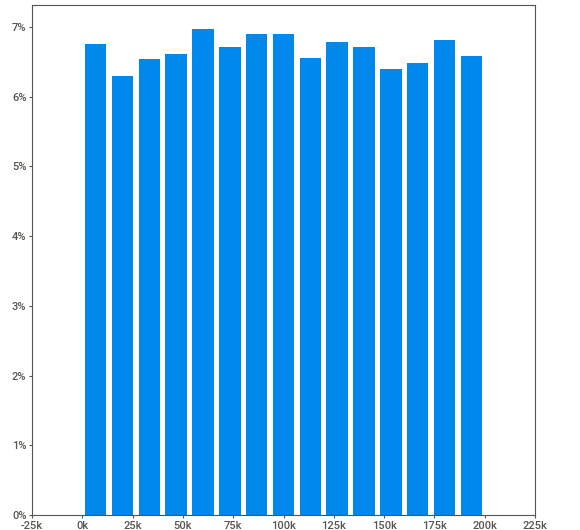
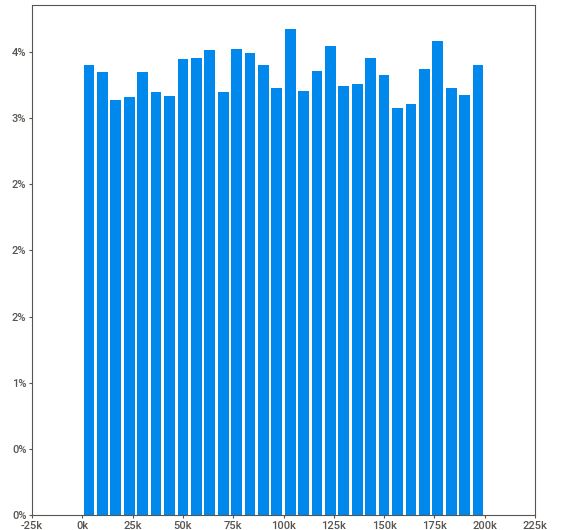
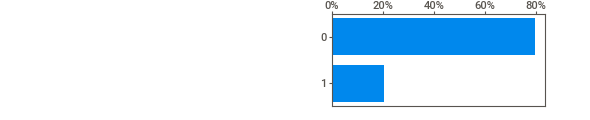
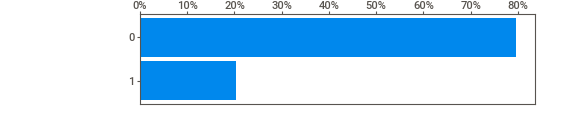
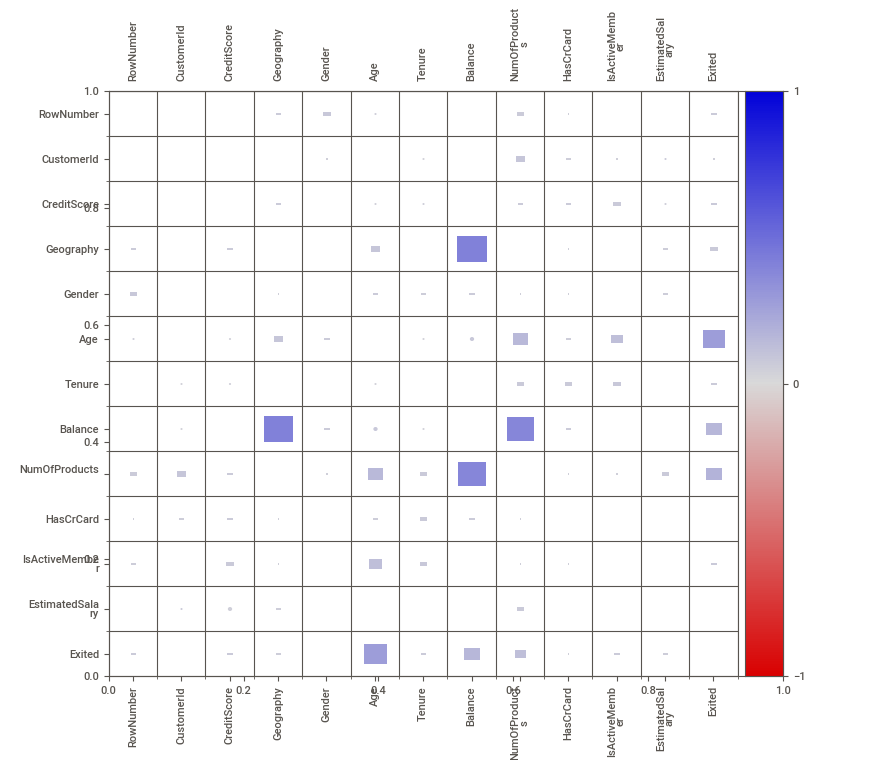
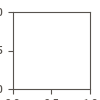

In [362]:
# Generate the report
report = sv.analyze(churn)

# Display the report in the notebook
report.show_notebook()

Based on the report generated by sweetviz, we can inspect the basic overview of the rows:
<br>
0. Overall insight: it has 10150 rows and 14 features, 6 categorical, 7 numerical and 1 text. It has 104 duplicates.Let's inspect the duplicates


In [363]:
duplicated_rows = churn[churn.duplicated(keep=False)]
duplicated_rows=duplicated_rows.sort_values(by='CustomerId')
duplicated_rows


RowNumber  CustomerId           Surname  CreditScore Geography  Gender  \
10029        411    15566594          McKenzie        709.0     Spain    Male   
410          411    15566594          McKenzie        709.0     Spain    Male   
5541        5542    15566740          Nazarova        587.0     Spain    Male   
10115       5542    15566740          Nazarova        587.0     Spain    Male   
10125       4435    15568429          Mitchell        633.0     Spain  Female   
...          ...         ...               ...          ...       ...     ...   
10144       6524    15806249              Kerr        671.0     Spain  Female   
10025        428    15806964               Utz        702.0    France    Male   
427          428    15806964               Utz        702.0    France    Male   
10015        907    15814275  Zikoranachidimma        685.0    France    Male   
906          907    15814275  Zikoranachidimma        685.0    France    Male   

        Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
10029  23.0    10.0       0.00            2.0        0.0             0.0   
410    23.0    10.0       0.00            2.0        0.0             0.0   
5541   51.0     3.0   83739.32            1.0        0.0             1.0   
10115  51.0     3.0   83739.32            1.0        0.0             1.0   
10125  46.0     3.0       0.00            2.0        1.0             0.0   
...     ...     ...        ...            ...        ...             ...   
10144  31.0     4.0       0.00            2.0        0.0             1.0   
10025  45.0     0.0   80793.58            1.0        1.0             1.0   
427    45.0     0.0   80793.58            1.0        1.0             1.0   
10015  33.0     6.0  174912.72            1.0        1.0             1.0   
906    33.0     6.0  174912.72            1.0        1.0             1.0   

       EstimatedSalary  Exited  
10029        129590.18       0  
410          129590.18       0  
5541         148798.45       0  
10115        148798.45       0  
10125        120250.58       0  
...                ...     ...  
10144         79270.02       0  
10025         27474.81       0  
427           27474.81       0  
10015         43932.54       0  
906           43932.54       0  

[208 rows x 14 columns]

In [364]:
# Remove the duplicates
churn.drop_duplicates(inplace=True)
churn[churn.duplicated(keep=False)]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

Now we don't have any duplicates although we should inspect the duplicated customer IDs as this feature should be unique



In [365]:
churn_sorted_duplicates = churn[churn.duplicated(subset='CustomerId', keep=False)].sort_values(by='CustomerId')
churn_sorted_duplicates

RowNumber  CustomerId  Surname  CreditScore Geography  Gender   Age  \
1553        1554    15568106      NaN        592.0    France  Female  38.0   
10068       1554    15568106      NaN        592.0    France  Female   NaN   
658          659    15568595  Fleming        544.0    France    Male  64.0   
10104        659    15568595  Fleming        544.0    France    Male   NaN   
10062       2706    15585835     Lord        655.0     Spain     NaN  34.0   
...          ...         ...      ...          ...       ...     ...   ...   
10066       1262    15794870      Sal        744.0       NaN    Male  38.0   
10106       4919    15796074    Bruno        717.0    France  Female  36.0   
4918        4919    15796074    Bruno        717.0    France  Female   NaN   
10002       1432    15809772   Glover        667.0    France    Male  48.0   
1431        1432    15809772   Glover        667.0    France    Male  48.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1553      8.0  119278.01            2.0        0.0             1.0   
10068     8.0  119278.01            2.0        0.0             1.0   
658       9.0  113829.45            1.0        1.0             1.0   
10104     9.0  113829.45            1.0        1.0             1.0   
10062     4.0  109783.69            2.0        1.0             0.0   
...       ...        ...            ...        ...             ...   
10066     6.0   73023.17            2.0        1.0             0.0   
10106     2.0   99472.76            2.0        1.0             0.0   
4918      2.0   99472.76            2.0        1.0             0.0   
10002     2.0       0.00            1.0        1.0             0.0   
1431      2.0       0.00            1.0        NaN             0.0   

       EstimatedSalary  Exited  
1553          19370.73       0  
10068         19370.73       0  
658          124341.49       0  
10104        124341.49       0  
10062        134034.32       0  
...                ...     ...  
10066         78770.86       0  
10106         94274.72       1  
4918          94274.72       1  
10002         43229.20       0  
1431          43229.20       0  

[92 rows x 14 columns]

We can see that for similar customer IDs that do not match there is some missing value in one of them. Let's fill out the missing values and get rid of the duplicates

In [366]:
churn_filled = churn_sorted_duplicates.groupby('CustomerId').apply(lambda group: group.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)
churn_filled.drop_duplicates(inplace=True)

C:\Users\donna\AppData\Local\Temp\ipykernel_2376\713220667.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [367]:
churn_filled

RowNumber  CustomerId       Surname  CreditScore Geography  Gender   Age  \
0        1554    15568106           NaN        592.0    France  Female  38.0   
2         659    15568595       Fleming        544.0    France    Male  64.0   
4        2706    15585835          Lord        655.0     Spain  Female  34.0   
6        2761    15591123       Iredale        557.0   Germany    Male  68.0   
8        9505    15591724           Liu        560.0    France  Female  44.0   
10       9431    15591980          Hill        753.0    France    Male  33.0   
12       6568    15593425     Bracewell        662.0     Spain  Female  54.0   
14       1230    15607598      Muravyov        575.0     Spain  Female  31.0   
16        371    15611579    Sutherland        801.0     Spain    Male  42.0   
18       4541    15613017      McMillan        586.0   Germany    Male  32.0   
20       6997    15614962       Pavlova        623.0     Spain  Female  50.0   
22       2106    15615096         Costa        492.0    France  Female  31.0   
24       5460    15617507        Wilson        530.0     Spain  Female  36.0   
26       4843    15624820          Ross        683.0     Spain    Male  56.0   
28       5304    15645766  Kosisochukwu        634.0     Spain    Male  25.0   
30       9248    15650244      Bezrukov        786.0     Spain    Male  29.0   
32       3208    15652400          Moss        667.0     Spain    Male  56.0   
34       3857    15653306      Ermakova        679.0   Germany  Female  32.0   
36       4591    15680167       Thomson        635.0    France  Female  78.0   
38       7512    15686913          Kung        757.0    France    Male  38.0   
40       6939    15698324       Azikiwe        725.0    France  Female  33.0   
42       3196    15705298           NaN        697.0   Germany    Male  29.0   
44       7612    15705506         Perry        751.0     Spain    Male  38.0   
46       5872    15709920         Burke        479.0    France  Female  33.0   
48       3085    15724402         Tyler        770.0    France  Female  30.0   
50        221    15725311           Hay        726.0    France  Female  31.0   
52       2465    15725818       Chibuzo        583.0   Germany    Male  40.0   
54       8611    15731553         Lucas        730.0    France    Male  23.0   
56       5392    15733661   Illingworth        639.0     Spain  Female  27.0   
58         27    15736816         Young        756.0   Germany    Male  36.0   
60       6348    15754820   Bergamaschi        637.0   Germany    Male  35.0   
62       2998    15756820       Fleming        655.0    France  Female  26.0   
64       8932    15761487      Yefimova        678.0    France  Female  55.0   
66       4982    15768137          Bray        667.0     Spain  Female  23.0   
68       6320    15768340       Beavers        642.0   Germany  Female  19.0   
70       5040    15775490        Downie        660.0    France  Female  38.0   
71       5040    15775490        Downie        660.0    France  Female  38.0   
72       1674    15780835         Liang        652.0   Germany  Female  26.0   
74       1972    15780954          Cran        582.0     Spain    Male  26.0   
76       6046    15784594         Mazzi        549.0   Germany  Female  37.0   
78       6497    15789313        Ugorji        595.0   Germany  Female  44.0   
80       7680    15790689       Hibbins        647.0     Spain    Male  32.0   
82       5777    15793478      Li Fonti        593.0   Germany  Female  39.0   
84       5830    15794266         Cross        559.0    France    Male  32.0   
86       1262    15794870           Sal        744.0   Germany    Male  38.0   
88       4919    15796074         Bruno        717.0    France  Female  36.0   
90       1432    15809772        Glover        667.0    France    Male  48.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0    8.000000  119278.01            2.0        0.0             1.0   
2    9.000000  113829.4

In [368]:
# Remove duplicates based on 'CustomerID', keep the first occurrence
churn = churn.drop_duplicates(subset='CustomerId', keep='first')

In [369]:
churn[churn.duplicated(subset='CustomerId') == True]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [370]:
# Let's replace the rows with the same customer id from the original dataset with the filled dataset
# Set 'CustomerID' as index to facilitate the merge
churn.set_index('CustomerId', inplace=True)
churn_filled.set_index('CustomerId', inplace=True)

In [371]:
# Use combine_first to update the original churn data with the data from churn_filled
churn_combined = churn_filled.combine_first(churn)
churn_combined

RowNumber   Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                                     
15565701         1288     Ferri        698.0     Spain     NaN  39.0     9.0   
15565706         4199  Akobundu        612.0     Spain    Male  35.0     1.0   
15565714         7091  Cattaneo        601.0    France    Male  47.0     1.0   
15565779         2021      Kent        627.0   Germany  Female  30.0     6.0   
15565796         3698  Docherty        745.0   Germany    Male  48.0    10.0   
...               ...       ...          ...       ...     ...   ...     ...   
15815628         3412    Moysey        711.0    France  Female  37.0     8.0   
15815645         8272    Akhtar        481.0    France     NaN  37.0     8.0   
15815656         8089   Hopkins        541.0   Germany  Female  39.0     9.0   
15815660         1763     Mazzi        758.0    France  Female  34.0     1.0   
15815690         5503  Akabueze        614.0     Spain  Female  40.0     3.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                        
15565701    161993.89            1.0        0.0             0.0   
15565706         0.00            1.0        1.0             1.0   
15565714     64430.06            2.0        0.0             1.0   
15565779     57809.32            1.0        1.0             0.0   
15565796     96048.55            1.0        1.0             0.0   
...               ...            ...        ...             ...   
15815628    113899.92            1.0        0.0             0.0   
15815645    152303.66            2.0        1.0             1.0   
15815656    100116.67            1.0        1.0             1.0   
15815660    154139.45            1.0        1.0             1.0   
15815690    113348.50            1.0        1.0             1.0   

            EstimatedSalary  Exited  
CustomerId                           
15565701           90212.38       0  
15565706           83256.26       1  
15565714           96517.97       0  
15565779          188258.49       0  
15565796           74510.65       0  
...                     ...     ...  
15815628           80215.20       0  
15815645          175082.20       0  
15815656          199808.10       1  
15815660           60728.89       0  
15815690           77789.01       0  

[10001 rows x 13 columns]

In [372]:

# Reset index to get 'CustomerID' back as a column
churn_combined.reset_index(inplace=True)
churn_combined

CustomerId  RowNumber   Surname  CreditScore Geography  Gender   Age  \
0        15565701       1288     Ferri        698.0     Spain     NaN  39.0   
1        15565706       4199  Akobundu        612.0     Spain    Male  35.0   
2        15565714       7091  Cattaneo        601.0    France    Male  47.0   
3        15565779       2021      Kent        627.0   Germany  Female  30.0   
4        15565796       3698  Docherty        745.0   Germany    Male  48.0   
...           ...        ...       ...          ...       ...     ...   ...   
9996     15815628       3412    Moysey        711.0    France  Female  37.0   
9997     15815645       8272    Akhtar        481.0    France     NaN  37.0   
9998     15815656       8089   Hopkins        541.0   Germany  Female  39.0   
9999     15815660       1763     Mazzi        758.0    France  Female  34.0   
10000    15815690       5503  Akabueze        614.0     Spain  Female  40.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0         9.0  161993.89            1.0        0.0             0.0   
1         1.0       0.00            1.0        1.0             1.0   
2         1.0   64430.06            2.0        0.0             1.0   
3         6.0   57809.32            1.0        1.0             0.0   
4        10.0   96048.55            1.0        1.0             0.0   
...       ...        ...            ...        ...             ...   
9996      8.0  113899.92            1.0        0.0             0.0   
9997      8.0  152303.66            2.0        1.0             1.0   
9998      9.0  100116.67            1.0        1.0             1.0   
9999      1.0  154139.45            1.0        1.0             1.0   
10000     3.0  113348.50            1.0        1.0             1.0   

       EstimatedSalary  Exited  
0             90212.38       0  
1             83256.26       1  
2             96517.97       0  
3            188258.49       0  
4             74510.65       0  
...                ...     ...  
9996          80215.20       0  
9997         175082.20       0  
9998         199808.10       1  
9999          60728.89       0  
10000         77789.01       0  

[10001 rows x 14 columns]

In [373]:
# Test and retrieve rows with a specific CustomerID
customer_id_to_test = 15568106  # Replace with the CustomerID you want to test
rows_with_customer_id = churn_combined[churn_combined['CustomerId'] == customer_id_to_test]

# Display the rows
display(rows_with_customer_id)


CustomerId  RowNumber Surname  CreditScore Geography  Gender   Age  \
87    15568106       1554     NaN        592.0    France  Female  38.0   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
87     8.0  119278.01            2.0        0.0             1.0   

    EstimatedSalary  Exited  
87         19370.73       0

In [374]:
# Test and retrieve rows with a specific CustomerID
customer_id_to_test = 15568595  # Replace with the CustomerID you want to test
rows_with_customer_id = churn_combined[churn_combined['CustomerId'] == customer_id_to_test]
# Display the rows
display(rows_with_customer_id)

CustomerId  RowNumber  Surname  CreditScore Geography Gender   Age  \
104    15568595        659  Fleming        544.0    France   Male  64.0   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
104     9.0  113829.45            1.0        1.0             1.0   

     EstimatedSalary  Exited  
104        124341.49       0

In [375]:

# Test and retrieve rows with a specific CustomerID
customer_id_to_test = 15701354  # Replace with the CustomerID you want to test
rows_with_customer_id = churn_combined[churn_combined['CustomerId'] == customer_id_to_test]
# Display the rows
display(rows_with_customer_id)

CustomerId  RowNumber Surname  CreditScore Geography  Gender   Age  \
5435    15701354          4    Boni        699.0    France  Female  39.0   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
5435     1.0      0.0            2.0        0.0             NaN   

      EstimatedSalary  Exited  
5435         93826.63       0

                                             |          | [  0%]   00:00 -> (? left)


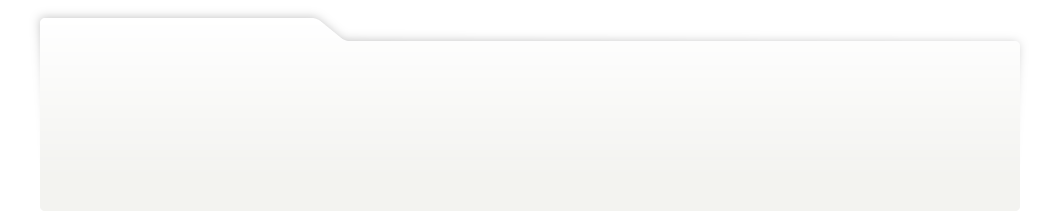
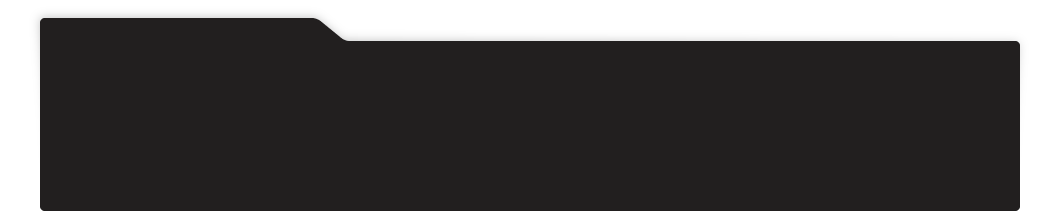
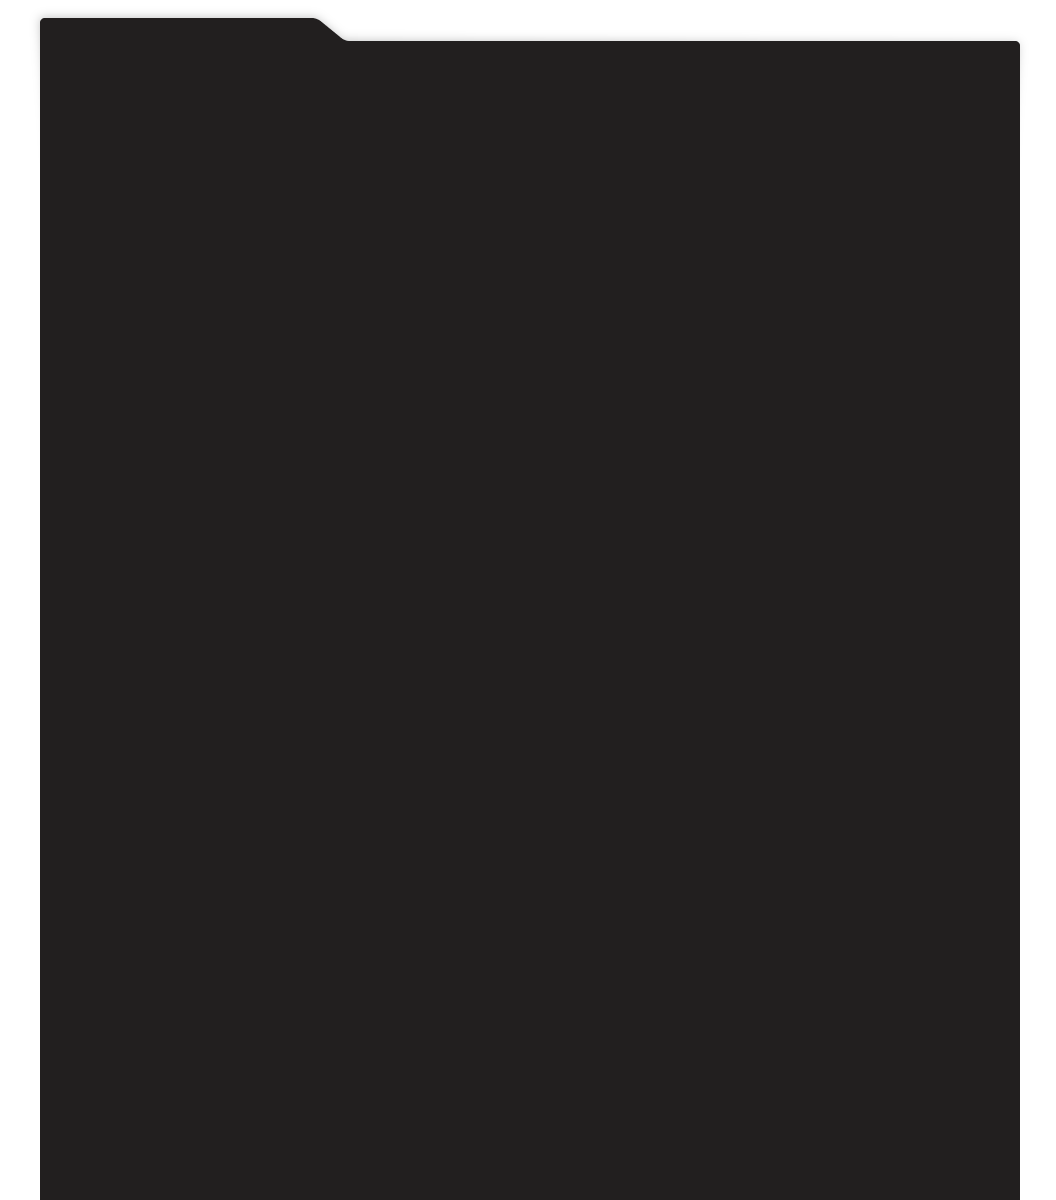
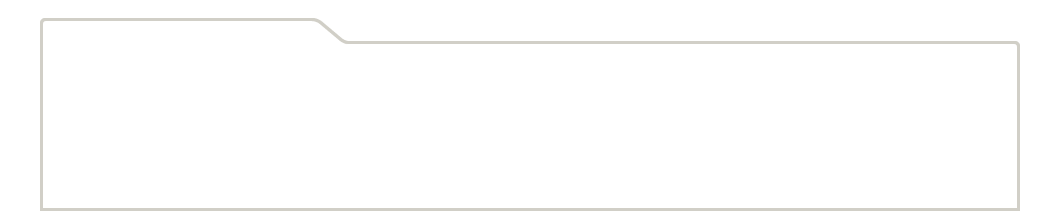
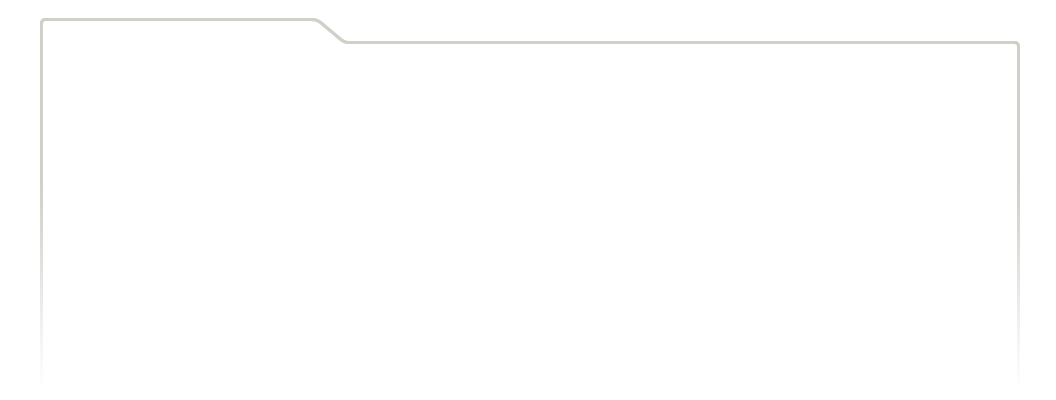
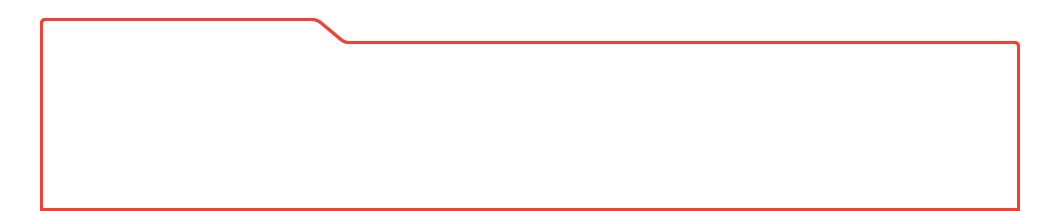
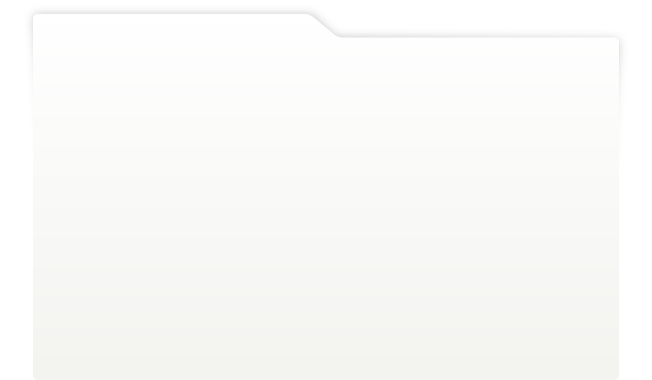
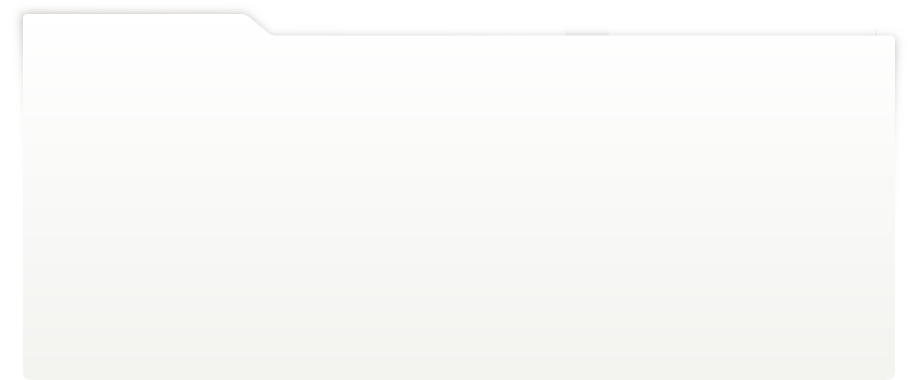
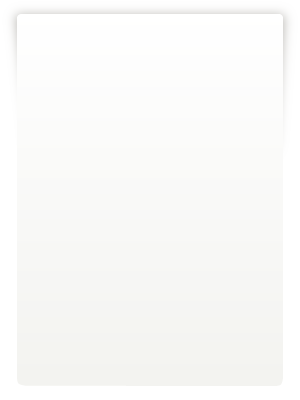
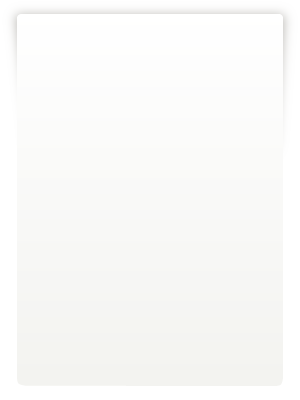
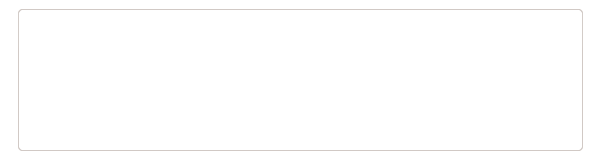
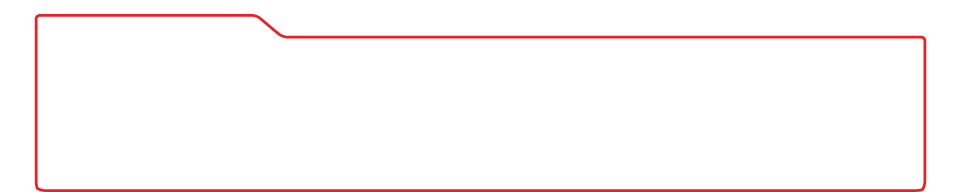
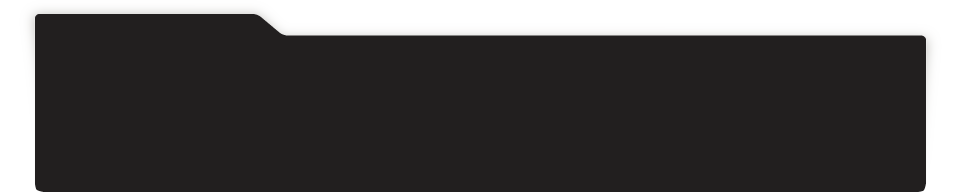
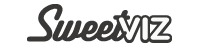
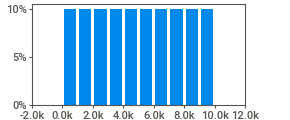
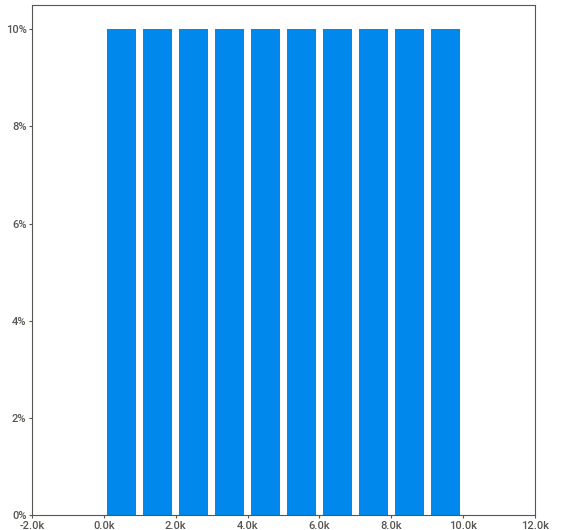
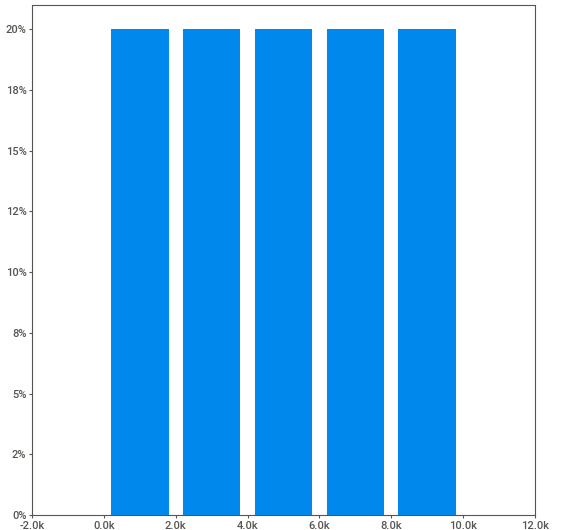
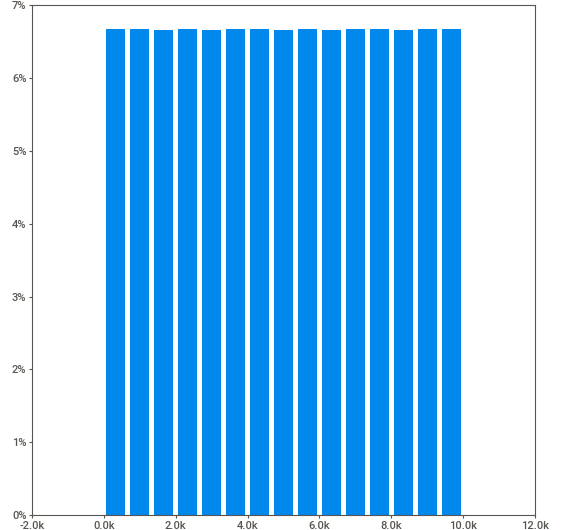
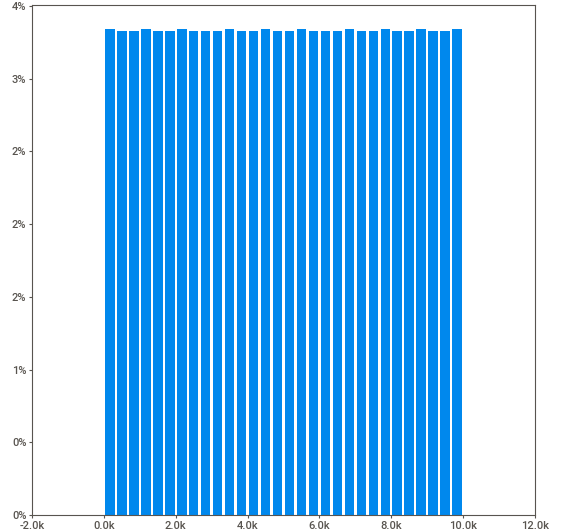
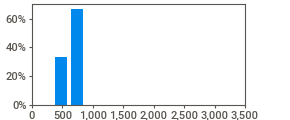
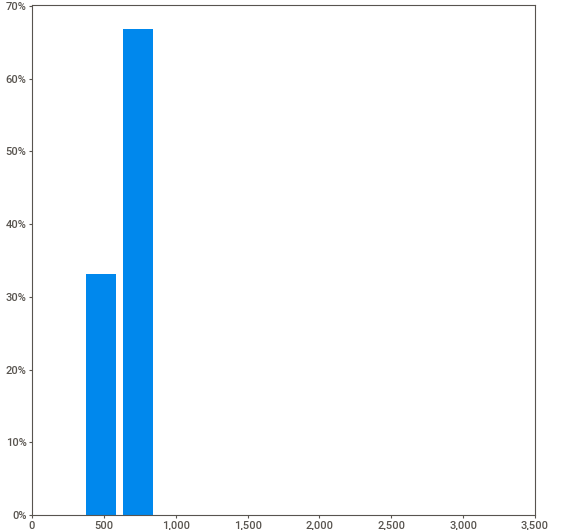
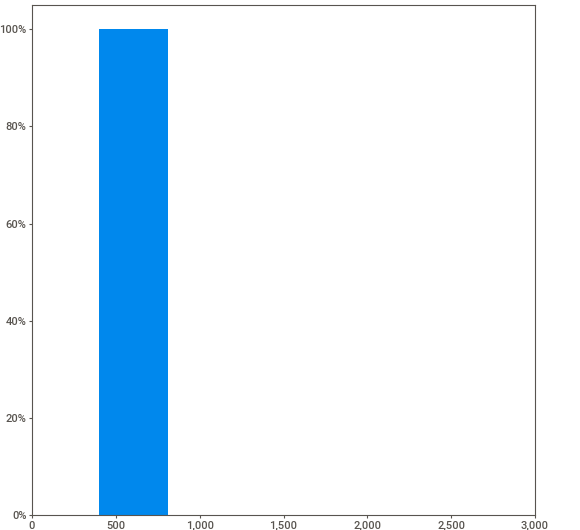
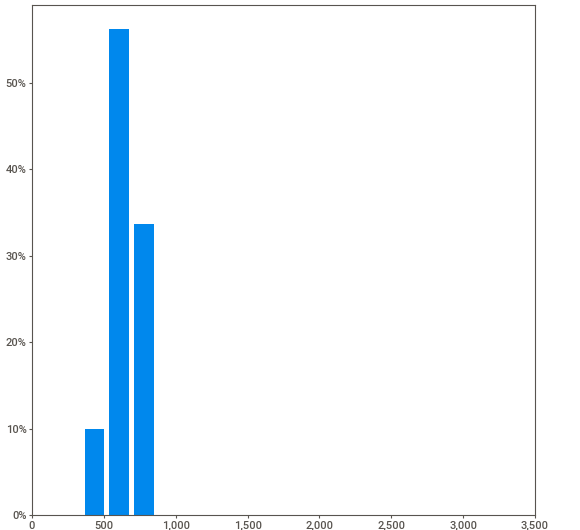
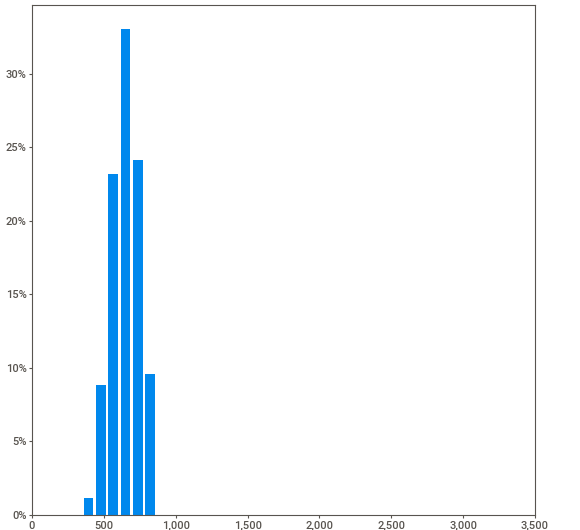
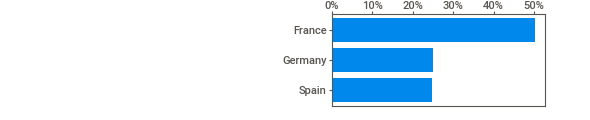
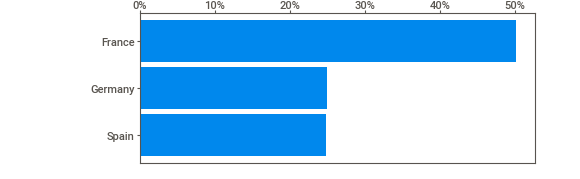
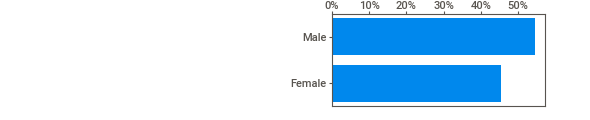
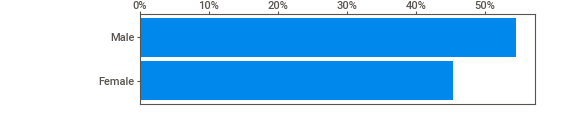
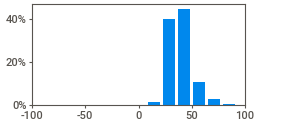
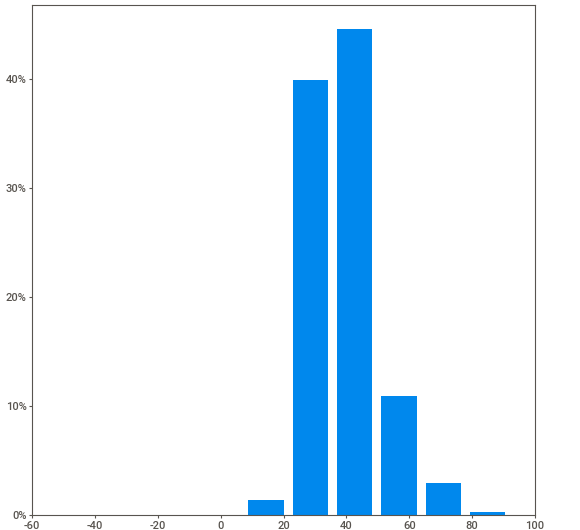
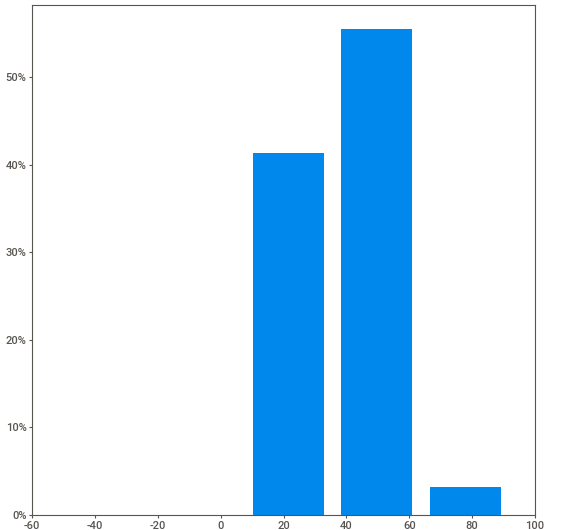
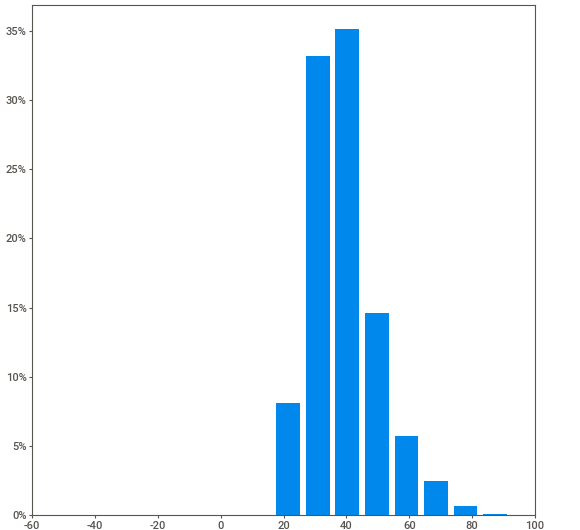
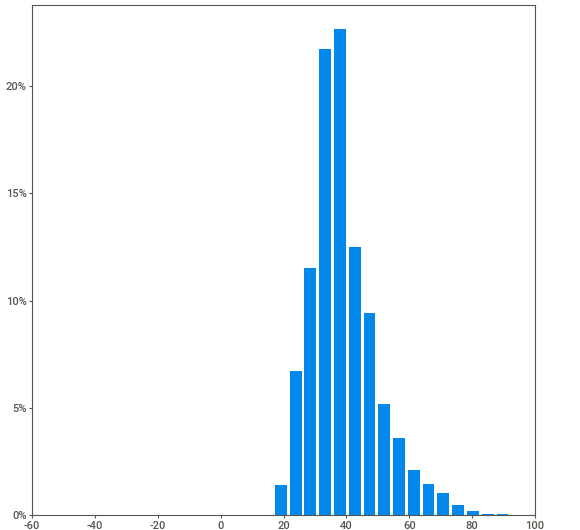
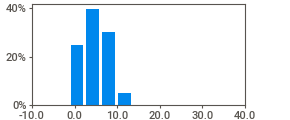
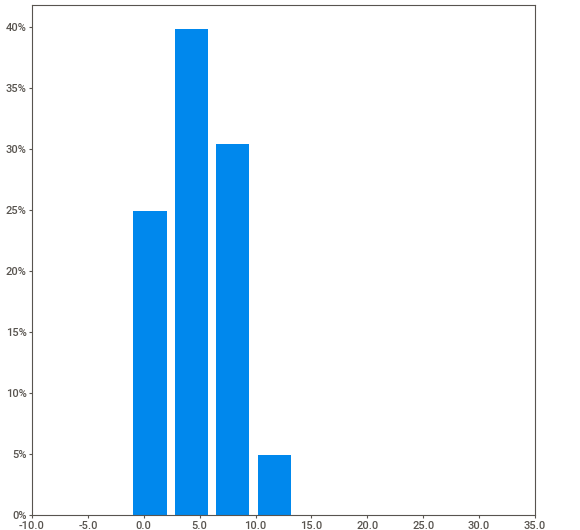
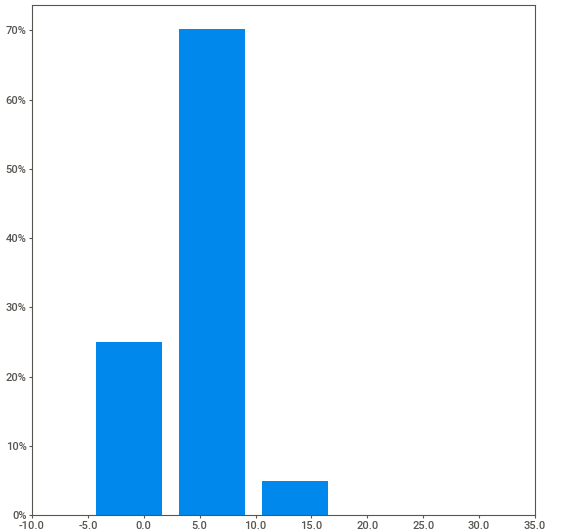
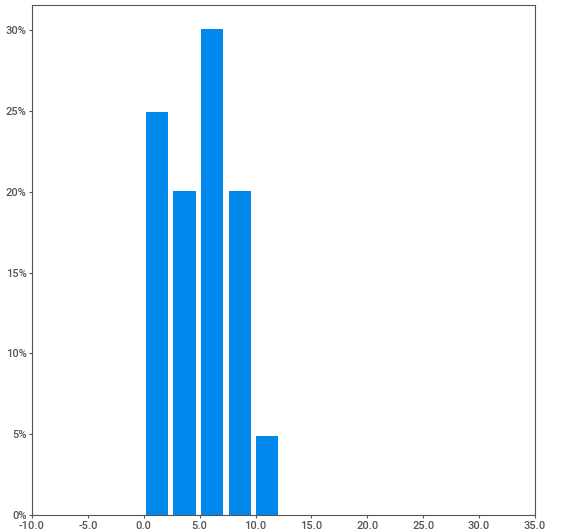
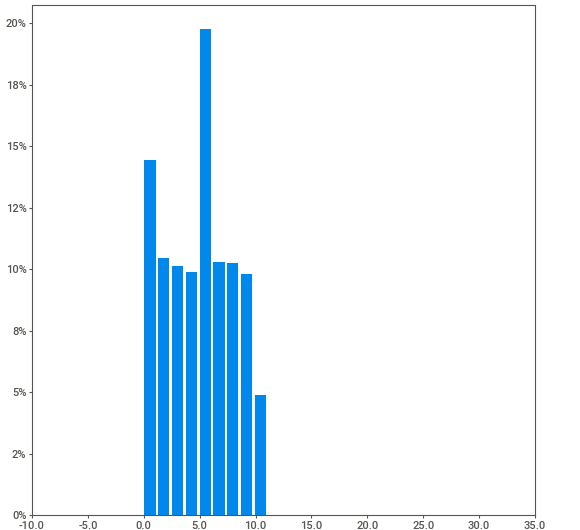
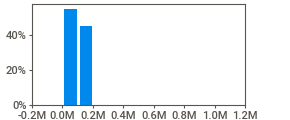
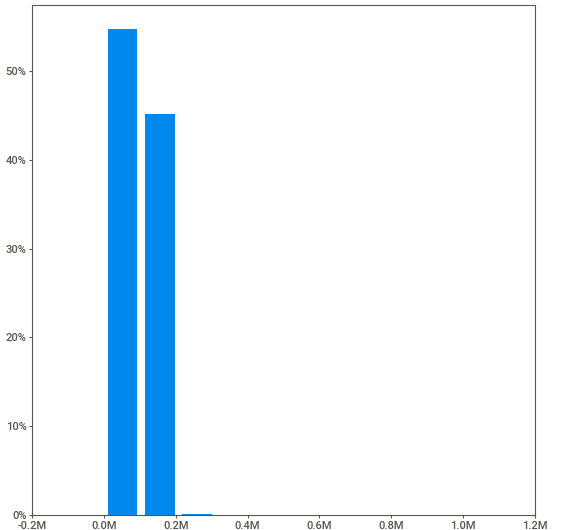
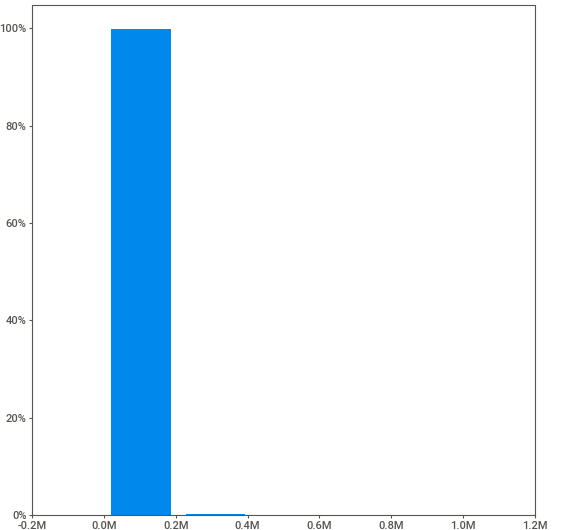
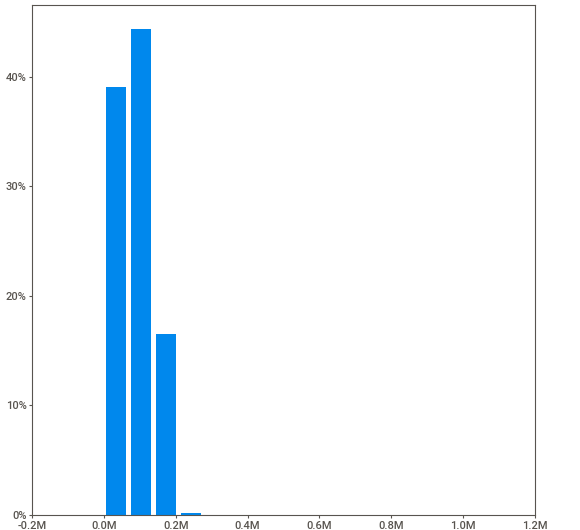
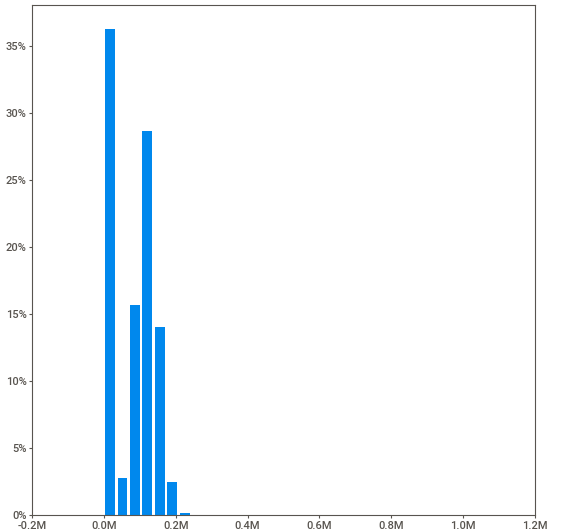
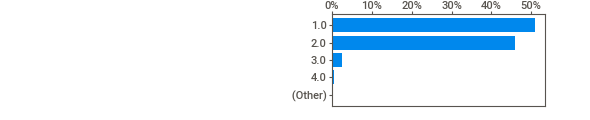
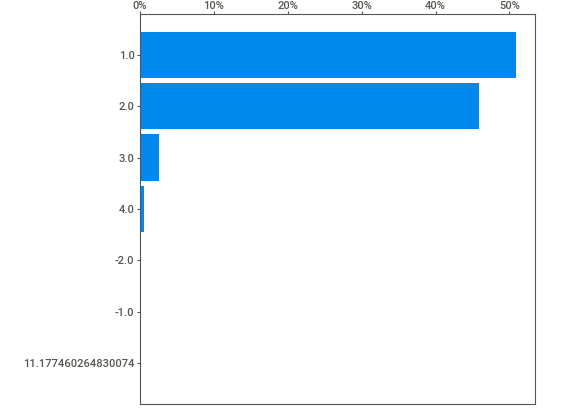
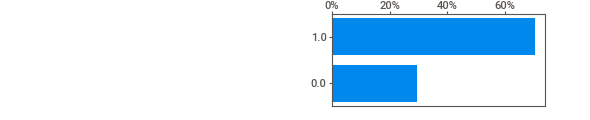
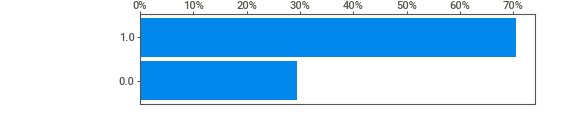
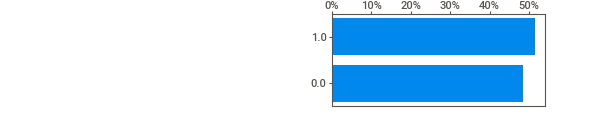
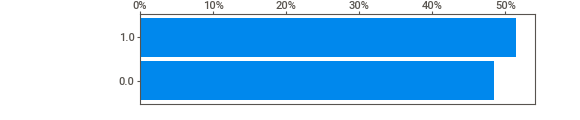
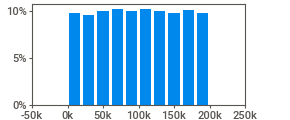
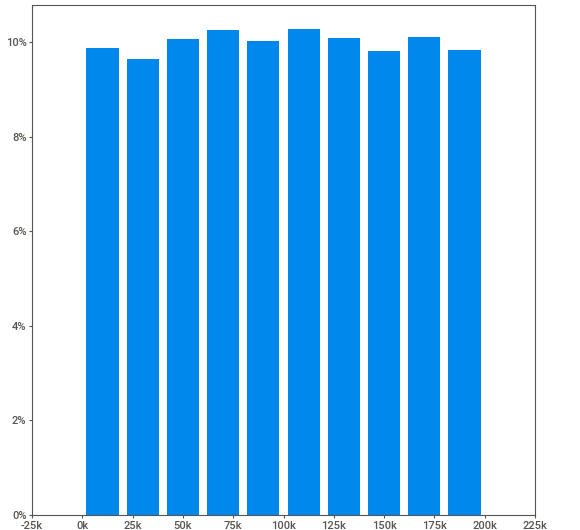
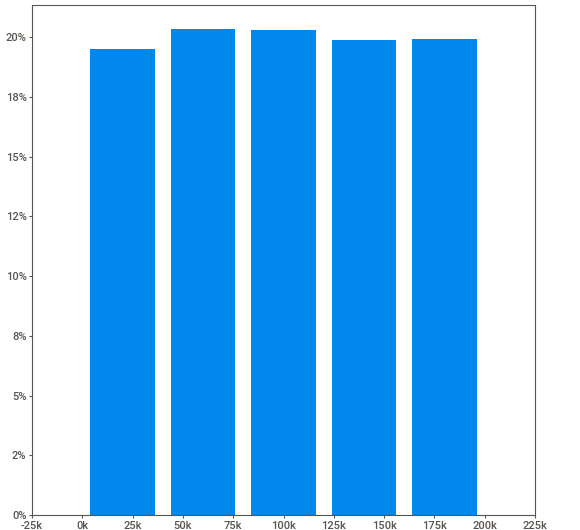
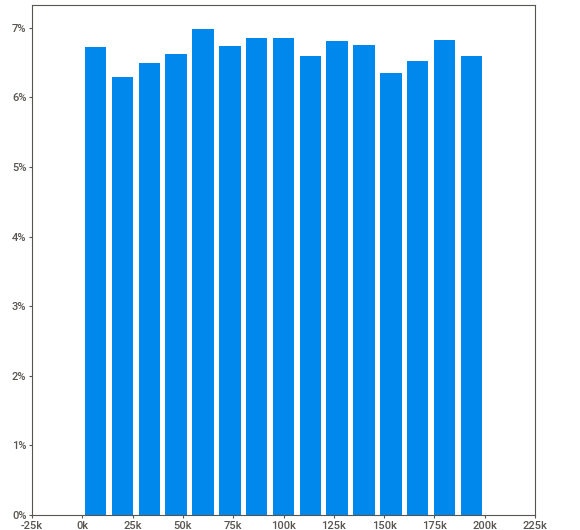
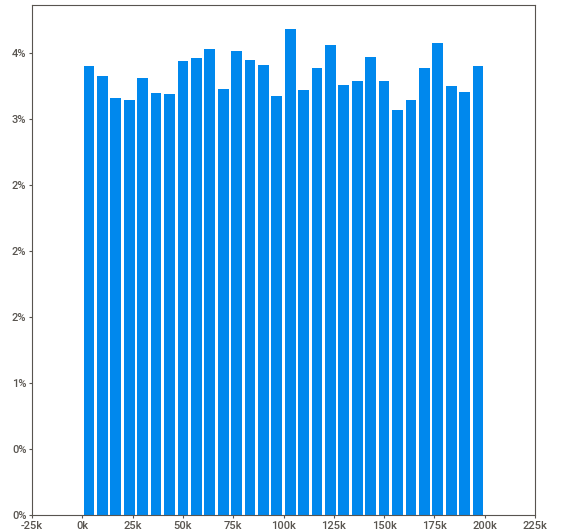
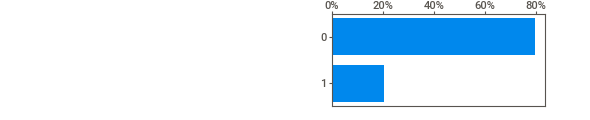
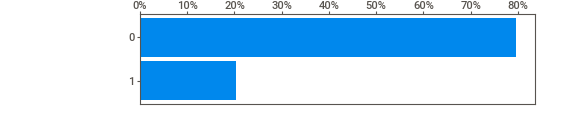
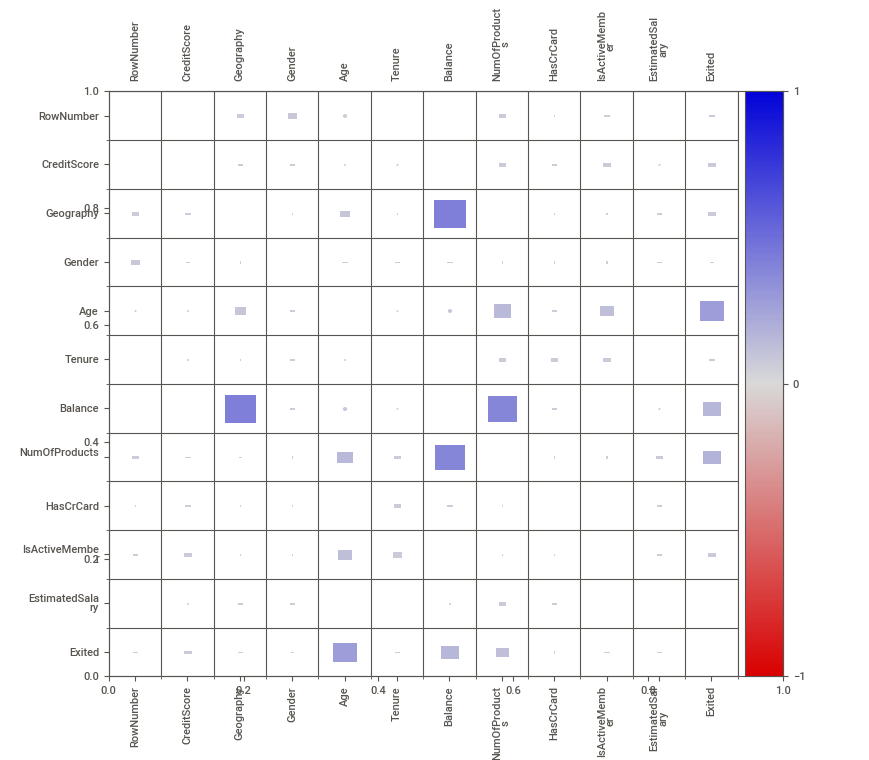
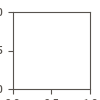

In [376]:
# Generate the report
report = sv.analyze(churn)

# Display the report in the notebook
report.show_notebook()

Now we got rid of duplicates let's start from the top of the table:
We have a dataframe of 10,000 rows with 13 features: 6 categorical,6 numerical and 1 text

1. Associations:
<br>
These can be beneficial in multivariate analysis but we can still have a look to get a grasp of how features are effecting each other so considering that in univariate analysis as well.
</br>
<br>
    Most Correlated:Balance and Geography - Balance and Num of Products
</br>
<br>
    Not Correlated or really low correlation: CreditScore/ Gender/ Tenure/HasCard/Estimated Salary
</br>
<br>
    Have some considerable correlation: age/exited - balance/exited - NumberofProducts /exited - age/is active - age/number of proudcts
</br>
<br>
    Exited or not as our target association with others:
</br>
<br>
    - Strong Correlation: Age --> Balance/Number Of Products
</br> 
<br>
    - Weak Correlation: IsActiveMember/Geography/Credit Score
</br>
<br>
    - No correlation or very weak correlation: Tenure --> Gneder --> HasCard --> Estimated Salary
</br>

#### **Row Number**
It is redundant feature as we have row number and Customer Id so I am going to delete that column

In [377]:
# Drop 
churn.drop(columns=['RowNumber'], inplace=True)

C:\Users\donna\AppData\Local\Temp\ipykernel_2376\155696111.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [378]:
churn_combined.drop(columns=['RowNumber'], inplace=True)

In [379]:
churn.reset_index()

CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0       15634602   Hargrave        619.0    France  Female  42.0     2.0   
1       15647311       Hill        608.0     Spain  Female  41.0     1.0   
2       15619304       Onio        502.0    France  Female  42.0     8.0   
3       15701354       Boni        699.0    France  Female  39.0     1.0   
4       15737888   Mitchell        850.0     Spain  Female  43.0     2.0   
...          ...        ...          ...       ...     ...   ...     ...   
9995    15606229   Obijiaku        771.0    France    Male  39.0     5.0   
9996    15569892  Johnstone        516.0    France    Male  35.0    10.0   
9997    15584532        Liu        709.0    France  Female  36.0     7.0   
9998    15682355  Sabbatini        772.0   Germany    Male  42.0     3.0   
9999    15628319     Walker        792.0    France  Female  28.0     4.0   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00            1.0        1.0             1.0        101348.88   
1      83807.86            1.0        0.0             1.0        112542.58   
2     159660.80            3.0        1.0             0.0        113931.57   
3          0.00            2.0        0.0             NaN         93826.63   
4     125510.82            1.0        1.0             1.0         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00            2.0        1.0             0.0         96270.64   
9996   57369.61            1.0        1.0             1.0        101699.77   
9997       0.00            1.0        0.0             1.0         42085.58   
9998   75075.31            2.0        1.0             0.0         92888.52   
9999  130142.79            1.0        1.0             0.0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

#### **Credit Score**

From the sweetbiz report we can see that the surname has 92 missing values which is not important.
<br>
Let's analyze credit score:
</br>

In [380]:
display(churn["CreditScore"].describe())
display(churn["CreditScore"].info())

# Count missing values
missing_values = churn["CreditScore"].isna().sum()
print(f"Missing values in CreditScore: {missing_values}")


count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: CreditScore, dtype: float64

<class 'pandas.core.series.Series'>
Index: 10000 entries, 15634602 to 15628319
Series name: CreditScore
Non-Null Count  Dtype  
--------------  -----  
9982 non-null   float64
dtypes: float64(1)
memory usage: 414.3 KB


None

Missing values in CreditScore: 18


In [421]:
def display_missing_values(df, score_column='CreditScore'):
    """
    Display missing values for a specified column from the DataFrame.

    Parameters:
    - df: (pd.DataFrame) The DataFrame containing the data.
    - score_column: (str) The name of the column to check for missing values (default is 'Balance').
    """
    # Check if the column exists in the DataFrame
    if score_column not in df.columns:
        raise ValueError(f"Column '{score_column}' does not exist in the DataFrame.")
    
    # Display the number of missing values in the specified column
    missing_count = df[score_column].isnull().sum()
    display(pd.DataFrame({'Missing Values': [missing_count]}))

    # Display the percentage of missing values in the specified column
    missing_percentage = (missing_count / len(df)) * 100
    display(pd.DataFrame({'Missing Percentage (%)': [missing_percentage]}))

    # Display rows with missing values in the specified column
    if missing_count > 0:
        display(df[df[score_column].isnull()])
    else:
        display(pd.DataFrame({'No Missing Values': [f"There are no missing values in '{score_column}' feature."]}))

In [424]:
display_missing_values(churn, score_column='CreditScore')

Missing Values
0              18

Missing Percentage (%)
0                0.180054

Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                              
15706021           Buley          NaN    France  Female  34.0     1.0   
15801559          Chiang          NaN   Germany  Female  41.0     9.0   
15576683             Yin          NaN     Spain  Female  43.0     9.0   
15645511        Chukwudi          NaN     Spain    Male  43.0     2.0   
15713608            Tuan          NaN    France  Female  41.0     5.0   
15689425         Olejuru          NaN     Spain    Male  35.0     8.0   
15605684          Phelan          NaN    France  Female  31.0     7.0   
15672640      Kambinachi          NaN     Spain  Female  45.0     4.0   
15669945         Jackson          NaN    France    Male  35.0     4.0   
15785815         Toscano          NaN   Germany    Male   NaN     1.0   
15788556        Trouette          NaN    France  Female  42.0     4.0   
15575498           Gould          NaN    France  Female  39.0     5.0   
15567802          Childs          NaN     Spain  Female   NaN     2.0   
15573888      Ponomaryov          NaN   Germany  Female  43.0     1.0   
15800482        Bradshaw          NaN     Spain  Female  33.0     7.0   
15595350          Fermin          NaN    France     NaN  31.0     3.0   
15616365          Obiuto          NaN    France  Female  53.0     2.0   
15797293    Sopuluchukwu          NaN    France  Female  25.0     3.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                        
15706021     96645.54            2.0        0.0             0.0   
15801559    181461.48            3.0        1.0             1.0   
15576683         0.00            1.0        1.0             0.0   
15645511     97403.18            1.0        1.0             1.0   
15713608         0.00            2.0        1.0             1.0   
15689425    100988.39            2.0        1.0             0.0   
15605684    104158.84            1.0        1.0             0.0   
15672640    114347.85            2.0        1.0             1.0   
15669945    141359.37            NaN        1.0             0.0   
15785815    142631.54            2.0        1.0             1.0   
15788556    148283.94            1.0        1.0             1.0   
15575498    149379.66            2.0        1.0             0.0   
15567802         0.00            2.0        1.0             0.0   
15573888    107963.38            1.0        0.0             0.0   
15800482         0.00            2.0        1.0             1.0   
15595350    136067.82            2.0        1.0             0.0   
15616365         0.00            2.0        1.0             0.0   
15797293         0.00            2.0        1.0             0.0   

            EstimatedSalary  Exited  
CustomerId                           
15706021          171413.66       0  
15801559                NaN       1  
15576683          125870.79       1  
15645511          107415.02       1  
15713608           34827.43       0  
15689425           22247.27       0  
15605684          134169.85       0  
15672640          109089.04       0  
15669945                NaN       0  
15785815          175894.24       0  
15788556           44692.63       1  
15575498           96075.55       0  
15567802          175480.93       0  
15573888          186438.86       1  
15800482          168261.40       0  
15595350           65567.91       0  
15616365           28045.77       0  
15797293          179608.96       0

In [423]:
# Filter rows where 'CreditScore' is missing
missing_credit_score_rows = churn[churn["CreditScore"].isna()]

# Display the rows with missing 'CreditScore' values
display(missing_credit_score_rows)

Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                              
15706021           Buley          NaN    France  Female  34.0     1.0   
15801559          Chiang          NaN   Germany  Female  41.0     9.0   
15576683             Yin          NaN     Spain  Female  43.0     9.0   
15645511        Chukwudi          NaN     Spain    Male  43.0     2.0   
15713608            Tuan          NaN    France  Female  41.0     5.0   
15689425         Olejuru          NaN     Spain    Male  35.0     8.0   
15605684          Phelan          NaN    France  Female  31.0     7.0   
15672640      Kambinachi          NaN     Spain  Female  45.0     4.0   
15669945         Jackson          NaN    France    Male  35.0     4.0   
15785815         Toscano          NaN   Germany    Male   NaN     1.0   
15788556        Trouette          NaN    France  Female  42.0     4.0   
15575498           Gould          NaN    France  Female  39.0     5.0   
15567802          Childs          NaN     Spain  Female   NaN     2.0   
15573888      Ponomaryov          NaN   Germany  Female  43.0     1.0   
15800482        Bradshaw          NaN     Spain  Female  33.0     7.0   
15595350          Fermin          NaN    France     NaN  31.0     3.0   
15616365          Obiuto          NaN    France  Female  53.0     2.0   
15797293    Sopuluchukwu          NaN    France  Female  25.0     3.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                        
15706021     96645.54            2.0        0.0             0.0   
15801559    181461.48            3.0        1.0             1.0   
15576683         0.00            1.0        1.0             0.0   
15645511     97403.18            1.0        1.0             1.0   
15713608         0.00            2.0        1.0             1.0   
15689425    100988.39            2.0        1.0             0.0   
15605684    104158.84            1.0        1.0             0.0   
15672640    114347.85            2.0        1.0             1.0   
15669945    141359.37            NaN        1.0             0.0   
15785815    142631.54            2.0        1.0             1.0   
15788556    148283.94            1.0        1.0             1.0   
15575498    149379.66            2.0        1.0             0.0   
15567802         0.00            2.0        1.0             0.0   
15573888    107963.38            1.0        0.0             0.0   
15800482         0.00            2.0        1.0             1.0   
15595350    136067.82            2.0        1.0             0.0   
15616365         0.00            2.0        1.0             0.0   
15797293         0.00            2.0        1.0             0.0   

            EstimatedSalary  Exited  
CustomerId                           
15706021          171413.66       0  
15801559                NaN       1  
15576683          125870.79       1  
15645511          107415.02       1  
15713608           34827.43       0  
15689425           22247.27       0  
15605684          134169.85       0  
15672640          109089.04       0  
15669945                NaN       0  
15785815          175894.24       0  
15788556           44692.63       1  
15575498           96075.55       0  
15567802          175480.93       0  
15573888          186438.86       1  
15800482          168261.40       0  
15595350           65567.91       0  
15616365           28045.77       0  
15797293          179608.96       0

Based on the report and the two reports above, there are 18 missing values in credit score. Let's see the distribution:


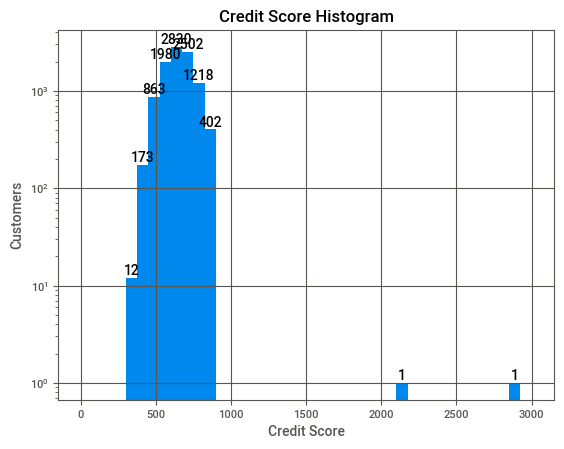

Min Credit Score: 350.0
Max Credit Score: 2924.008649131472
Outliers:
Number of outliers: 17
            CreditScore
CustomerId             
15656148     376.000000
15804586     376.000000
15779947     363.000000
15612494     359.000000
15685372     350.000000
15758813     350.000000
15692416     358.000000
15776631    2158.510025
15679249     351.000000
15597896     365.000000
15791533     367.000000
15727619    2924.008649
15803202     350.000000
15765173     350.000000
15792650     382.000000
15734711     373.000000
15668309     350.000000


In [382]:
# Plot the histogram for CreditScore
values, bins, _ = plt.hist(churn["CreditScore"].dropna(), bins=40, range=(0, 3000))
plt.title("Credit Score Histogram")
plt.xlabel("Credit Score")
plt.ylabel("Customers")
plt.grid(True)

# Annotate the histogram
for i, val in enumerate(values):
    if val != 0:
        plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, val, str(int(val)), ha="center", va="bottom")

plt.yscale("log")
plt.show()

# Calculate min and max values of CreditScore
min_value = churn["CreditScore"].min()
max_value = churn["CreditScore"].max()

print(f"Min Credit Score: {min_value}")
print(f"Max Credit Score: {max_value}")

# Identify outliers using a basic statistical approach (e.g., 1.5 IQR rule)
Q1 = churn["CreditScore"].quantile(0.25)
Q3 = churn["CreditScore"].quantile(0.75)
IQR = Q3 - Q1
outliers = churn[(churn["CreditScore"] < (Q1 - 1.5 * IQR)) | (churn["CreditScore"] > (Q3 + 1.5 * IQR))]
# Calculate the number of outliers
num_outliers = outliers.shape[0]


print("Outliers:")
print(f"Number of outliers: {num_outliers}")
print(outliers[["CreditScore"]])


So we have 17 outliers with 2 extreme outliers, and 18 missing values to deal with. let's dive into the box plot to visualize the outliers better:

In [416]:
def plot_distributions(df, score_column='CreditScore'):
    """
    Generate a violin plot and a box plot for the distribution of a specified score column from the DataFrame.

    Parameters:
    - df: (pd.DataFrame) The DataFrame containing the score data.
    - score_column: (str) The name of the column containing the score data (default is 'CreditScore').
    """
    # Check if the column exists in the DataFrame
    if score_column not in df.columns:
        raise ValueError(f"Column '{score_column}' does not exist in the DataFrame.")
    
    # Set figure size for better readability
    fig, axes = plt.subplots(1, 2, figsize=(16, 12))

    # Extract the score data
    scores = df[score_column]

    # Create the vertical violin plot on the first subplot
    sns.violinplot(y=scores, color='lightblue', inner="quartile", scale="count", bw=0.3, orient='v', ax=axes[0])

    # Add a title and labels to the violin plot
    axes[0].set_title(f"{score_column} Distribution Violin Plot", fontsize=18, fontweight='bold', color='darkblue')
    axes[0].set_ylabel(score_column, fontsize=15, fontweight='bold')
    axes[0].set_xlabel("Density", fontsize=15, fontweight='bold')

    # Add a horizontal line at the median score in the violin plot
    median_score = scores.median()
    axes[0].axhline(y=median_score, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Median {score_column}: {median_score:.1f}')

    # Add a horizontal line at the highest score in the violin plot
    max_score = scores.max()
    axes[0].axhline(y=max_score, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Highest {score_column}: {max_score:.1f}')

    # Add text annotations for the median and highest score in the violin plot
    axes[0].text(0, median_score, f'Median\n{median_score:.1f}', ha='left', va='center', fontsize=12, color='red', fontweight='bold', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
    axes[0].text(0, max_score, f'Highest\n{max_score:.1f}', ha='left', va='center', fontsize=12, color='green', fontweight='bold', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

    # Highlight high-value outliers with a different color in the violin plot
    axes[0].scatter([0], [max_score], color='orange', s=100, zorder=5, edgecolor='black', label='Outlier')

    # Add a legend to the violin plot
    axes[0].legend(fontsize=12, loc='upper left')

    # Add gridlines to the violin plot for better readability
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add tick labels with larger font to the violin plot for better readability
    axes[0].tick_params(axis='both', which='major', labelsize=12)

    # Create the vertical box plot on the second subplot
    sns.boxplot(y=scores, color='lightblue', ax=axes[1])

    # Add a title and labels to the box plot
    axes[1].set_title(f"{score_column} Distribution Box Plot", fontsize=18, fontweight='bold', color='darkblue')
    axes[1].set_ylabel(score_column, fontsize=15, fontweight='bold')
    axes[1].set_xlabel("")

    # Add gridlines to the box plot for better readability
    axes[1].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add tick labels with larger font to the box plot for better readability
    axes[1].tick_params(axis='both', which='major', labelsize=12)

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()


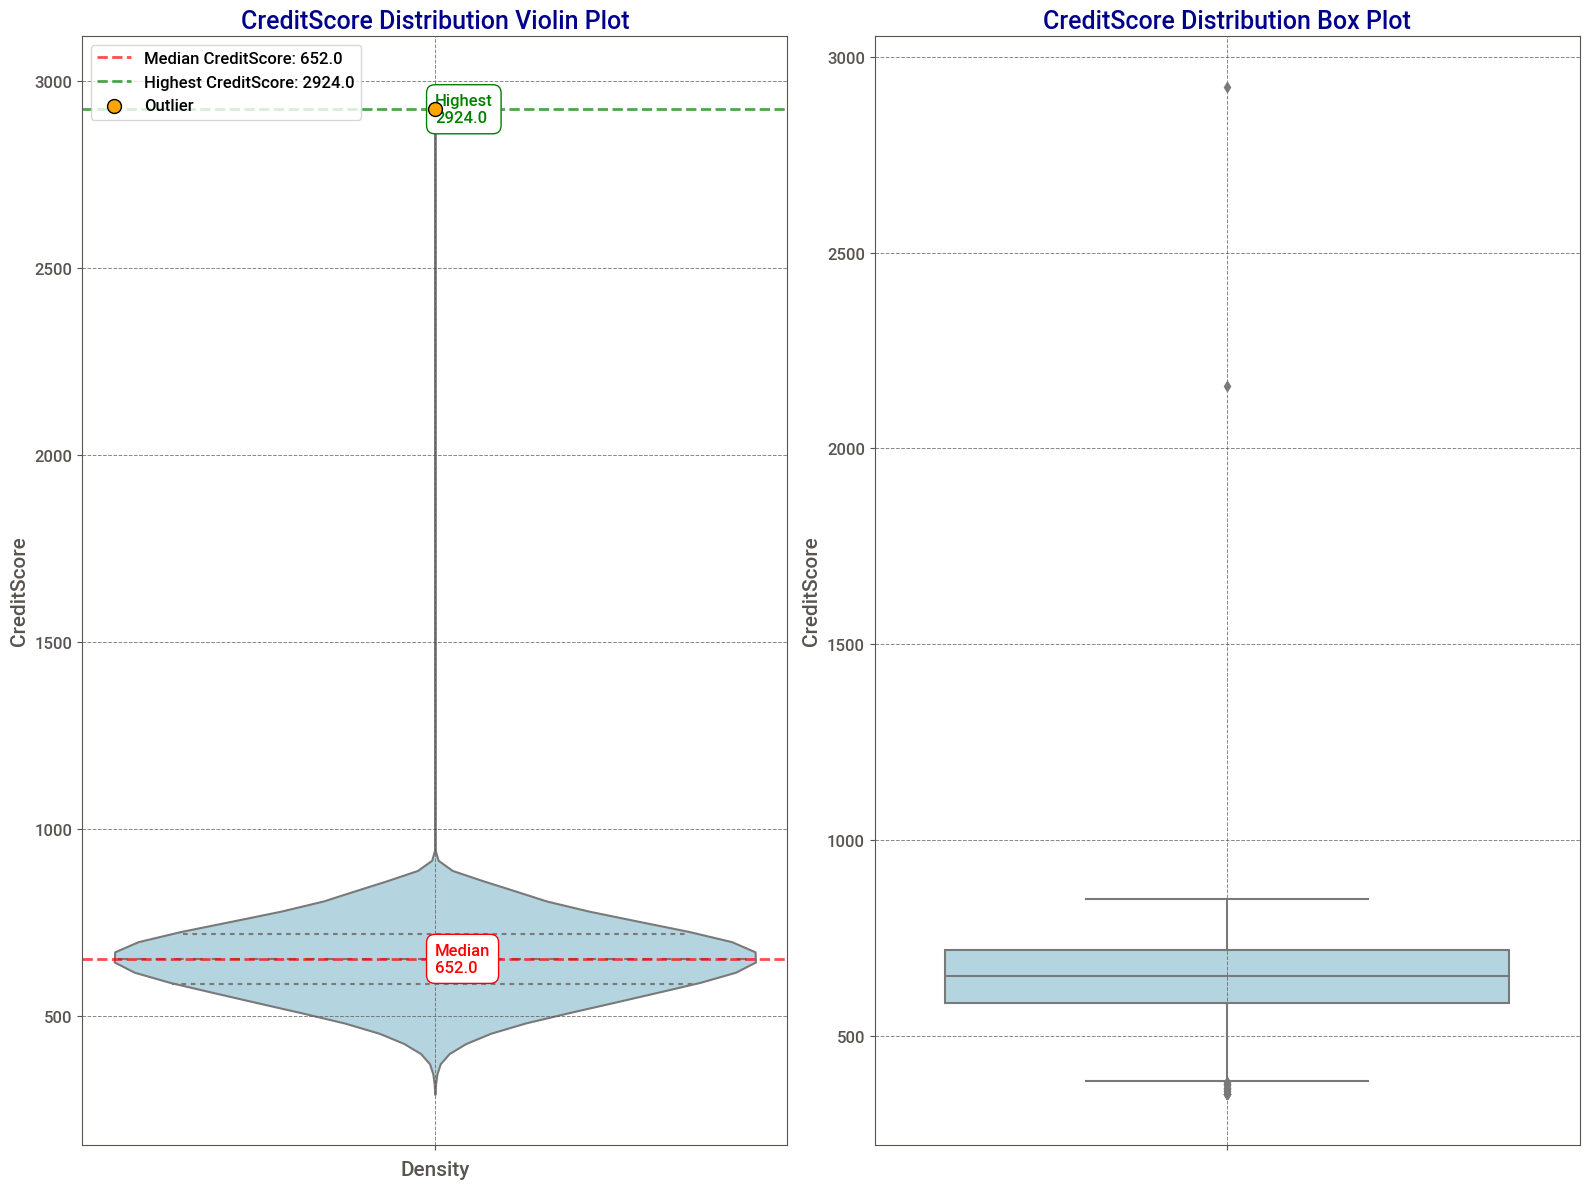

In [417]:
# Call the function to plot credit score distributions
plot_distributions(churn, 'CreditScore')

In [384]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = churn['CreditScore'].quantile(0.25)
Q3 = churn['CreditScore'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = churn[(churn['CreditScore'] < lower_bound) | (churn['CreditScore'] > upper_bound)]

# Display the rows with outliers
print("Rows with credit score outliers using the IQR method:")
display(outliers)

Rows with credit score outliers using the IQR method:


Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15656148       Obinna   376.000000   Germany  Female  29.0     4.0  115046.74   
15804586          Lin   376.000000    France  Female  46.0     6.0       0.00   
15779947       Thomas   363.000000     Spain  Female  28.0     6.0  146098.43   
15612494    Panicucci   359.000000    France  Female  44.0     6.0  128747.69   
15685372     Azubuike   350.000000     Spain    Male  54.0     1.0  152677.48   
15758813     Campbell   350.000000   Germany    Male  39.0     0.0  109733.20   
15692416    Aikenhead   358.000000     Spain  Female  52.0     8.0  143542.36   
15776631           Ma  2158.510025    France  Female  36.0     5.0  119540.15   
15679249         Chou   351.000000   Germany  Female  57.0     4.0  163146.46   
15597896     Ozoemena   365.000000   Germany    Male  30.0     0.0  127760.07   
15791533       Ch'ien   367.000000     Spain    Male  42.0     6.0   93608.28   
15727619         Lock  2924.008649   Germany  Female  46.0     9.0  113909.69   
15803202    Onyekachi   350.000000    France    Male  51.0    10.0       0.00   
15765173          Lin   350.000000    France  Female  60.0     3.0       0.00   
15792650        Watts   382.000000     Spain    Male  36.0     0.0       0.00   
15734711       Loggia   373.000000    France    Male  42.0     7.0       0.00   
15668309       Maslow   350.000000    France  Female  40.0     0.0  111098.85   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15656148              4.0        1.0             0.0        119346.88       1  
15804586              1.0        1.0             0.0        157333.69       1  
15779947              3.0        1.0             0.0        100615.14       1  
15612494              1.0        1.0             0.0        146955.71       1  
15685372              1.0        1.0             1.0        191973.49       1  
15758813              2.0        0.0             0.0        123602.11       1  
15692416              3.0        1.0             0.0        141959.11       1  
15776631              1.0        0.0             1.0         80603.99       0  
15679249              1.0        1.0             0.0        169621.69       1  
15597896              1.0        1.0             0.0         81537.85       1  
15791533              1.0        1.0             0.0        168816.73       1  
15727619              3.0        1.0             0.0         92320.37       1  
15803202              1.0        1.0             1.0        125823.79       1  
15765173              1.0        0.0             0.0        113796.15       1  
15792650              1.0        1.0             1.0        179540.73       1  
15734711              1.0        1.0             0.0         77786.37       1  
15668309              1.0        1.0             1.0        172321.21       1

In this section, we explored methods to identify outliers in the credit score data using both statistical techniques and visualizations. There is no error in the credit score data, but we have identified two extra outliers on the upper end and 15 outliers on the lower end. I am going to categorize the credit score later to both get rid of outliers and also make it easier to understand the data. Now, let's look into the next variable which is geography.

#### **Geography**

In [385]:
#Frequency table and bar plot for Geography to get the distribution of customers according to Geography
# Frequency table for countries
country = churn["Geography"].value_counts()
print("Customer count per country :")
print(country)

Customer count per country :
Geography
France     4923
Germany    2451
Spain      2431
Name: count, dtype: int64


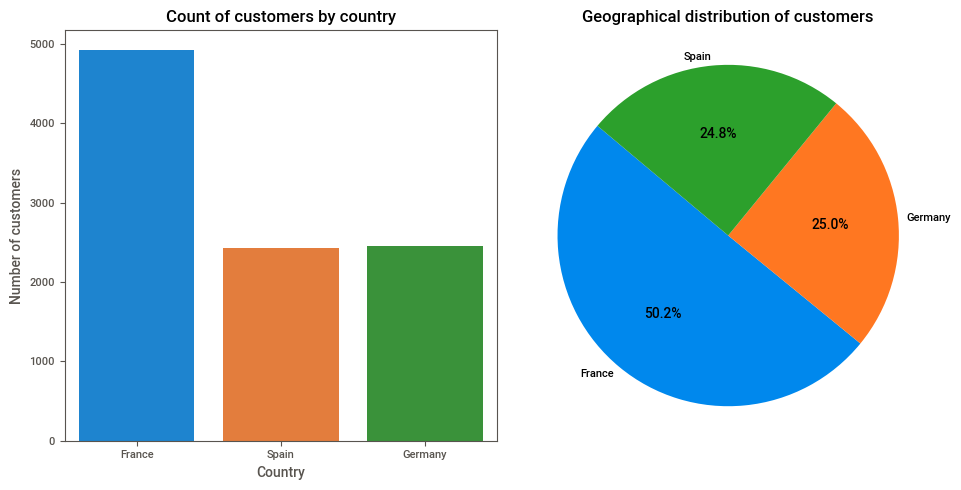

In [386]:
def new_func():
    # Create a figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for "Geography"
    sns.countplot(data=churn, x="Geography", ax=axes[0])
    axes[0].set_title("Count of customers by country")
    axes[0].set_xlabel("Country")
    axes[0].set_ylabel("Number of customers")

# Pie chart for geographical distribution
    country_counts = churn['Geography'].value_counts()
    axes[1].pie(country_counts, labels=country_counts.index, autopct="%1.1f%%", startangle=140, labeldistance=1.05)
    axes[1].set_title("Geographical distribution of customers")
    axes[1].axis("equal")  # Ensure the pie chart is circular

# Show the combined plot
    plt.tight_layout()
    plt.show()

new_func()

The bar chart and pie chart show that the distribution of customers in Spain and Germany is quite similar. However, France stands out with a significantly higher customer count, approximately twice that of Spain or Germany.
It can be deduced that around 50% of our customers have a bank account in France. This notable concentration suggests several possibilities:
Historical Presence: The bank may have been established in France many years ago, leading to a strong historical customer base.
French Ownership: The bank might be a French institution, which could explain the large number of customers in France.
Unique Services: The bank may offer exclusive services or products in France that are not available in Spain or Germany, attracting a larger customer base in that country.
Let's inspect the missing values:

In [425]:
display_missing_values(churn, score_column='Geography')

Missing Values
0             195

Missing Percentage (%)
0                1.950585

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15691483         Chin        549.0       NaN  Female  25.0     5.0       0.00   
15736816        Young        756.0       NaN    Male  36.0     2.0  136815.64   
15782688       Piccio        625.0       NaN    Male  56.0     0.0  148507.24   
15575492      Kennedy        828.0       NaN  Female  41.0     7.0       0.00   
15651001         Tsao        725.0       NaN  Female   NaN     5.0  116803.80   
...               ...          ...       ...     ...   ...     ...        ...   
15590177    Chiedozie        718.0       NaN  Female  44.0     NaN  133866.22   
15755731        Davis        635.0       NaN    Male  53.0     8.0  117005.55   
15735078    Onwughara        724.0       NaN  Female  53.0     1.0  139687.66   
15677783       Graham        764.0       NaN    Male  38.0     4.0  113607.47   
15692664       Diribe        677.0       NaN  Female  58.0     1.0   90022.85   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15691483              2.0        0.0             0.0        190857.79       0  
15736816              NaN        1.0             1.0        170041.95       0  
15782688              1.0        1.0             0.0         46824.08       1  
15575492              2.0        1.0             0.0        171378.77       0  
15651001              1.0        1.0             0.0        124052.97       0  
...                   ...        ...             ...              ...     ...  
15590177              1.0        0.0             1.0        139049.24       0  
15755731              1.0        0.0             1.0        123646.57       1  
15735078              2.0        1.0             1.0         12913.92       0  
15677783              1.0        1.0             0.0         91094.46       0  
15692664              1.0        0.0             1.0          2988.28       0  

[195 rows x 12 columns]

In [387]:
# Filter rows where 'Geography' is missing
missing_geography_rows = churn[churn["Geography"].isna()]

# Display the rows with missing 'Geography' values
display(missing_geography_rows)

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15691483         Chin        549.0       NaN  Female  25.0     5.0       0.00   
15736816        Young        756.0       NaN    Male  36.0     2.0  136815.64   
15782688       Piccio        625.0       NaN    Male  56.0     0.0  148507.24   
15575492      Kennedy        828.0       NaN  Female  41.0     7.0       0.00   
15651001         Tsao        725.0       NaN  Female   NaN     5.0  116803.80   
...               ...          ...       ...     ...   ...     ...        ...   
15590177    Chiedozie        718.0       NaN  Female  44.0     NaN  133866.22   
15755731        Davis        635.0       NaN    Male  53.0     8.0  117005.55   
15735078    Onwughara        724.0       NaN  Female  53.0     1.0  139687.66   
15677783       Graham        764.0       NaN    Male  38.0     4.0  113607.47   
15692664       Diribe        677.0       NaN  Female  58.0     1.0   90022.85   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15691483              2.0        0.0             0.0        190857.79       0  
15736816              NaN        1.0             1.0        170041.95       0  
15782688              1.0        1.0             0.0         46824.08       1  
15575492              2.0        1.0             0.0        171378.77       0  
15651001              1.0        1.0             0.0        124052.97       0  
...                   ...        ...             ...              ...     ...  
15590177              1.0        0.0             1.0        139049.24       0  
15755731              1.0        0.0             1.0        123646.57       1  
15735078              2.0        1.0             1.0         12913.92       0  
15677783              1.0        1.0             0.0         91094.46       0  
15692664              1.0        0.0             1.0          2988.28       0  

[195 rows x 12 columns]

It has 190 missing values which needs to be treated later.

#### **Gender**

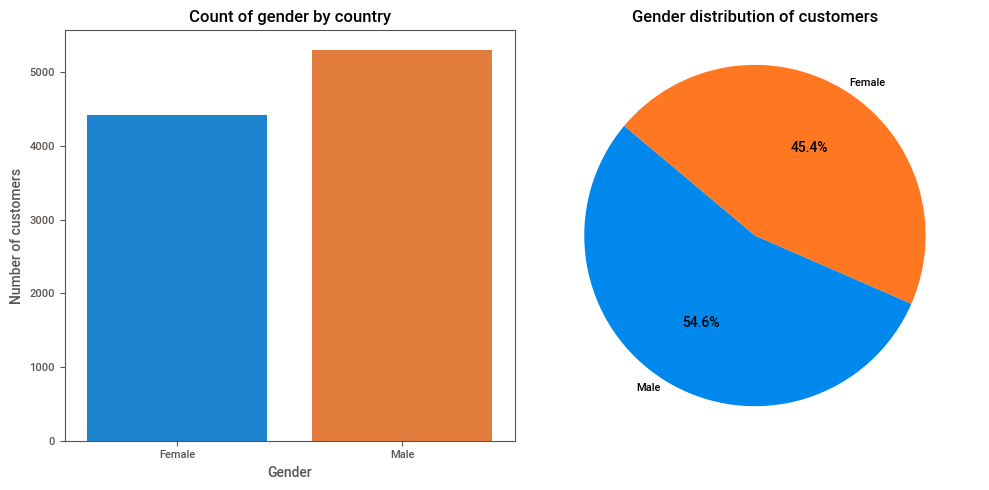

In [427]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for "Gender"
sns.countplot(data=churn, x="Gender", ax=axes[0])
axes[0].set_title("Count of gender by country")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of customers")

# Pie chart for geographical distribution
gender_counts = churn['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140, labeldistance=1.05)
axes[1].set_title("Gender distribution of customers")
axes[1].axis("equal")  # Ensure the pie chart is circular

# Show the combined plot
plt.tight_layout()
plt.show()

From the gender distribution data, we observe the following:
<br> - Male Customers constitute a larger proportion of the customer base compared to female customers.</br>
<br> - Specifically, the percentage of female customers is about 9% lower than that of male customers.</br>
<br>
This can be interpret as the following:
</br>
<br>
    **Market Preferences**: Product/Service Appeal: The bank’s products or services might be more appealing to men than women, which could influence the gender distribution of customers.
</br>
<br>
    **Marketing Strategies**: The bank’s marketing efforts may have been more targeted towards male customers, affecting the overall gender balance.
</br>
<br>
    **Historical Factors**: There could be historical trends or practices in the banking industry that have led to a higher male customer base.
</br>
<br>
    **Product Features**: The features or benefits of the bank’s products might be more aligned with the needs and preferences of male customers.
</br>
<br>
    **Customer Acquisition Strategies**: Different strategies used to attract customers might have inadvertently favored one gender over the other.
</br>

In [428]:
display_missing_values(churn, score_column='Gender')

Missing Values
0             278

Missing Percentage (%)
0                2.780834

Surname  CreditScore Geography Gender   Age  Tenure    Balance  \
CustomerId                                                                    
15676966       Capon        730.0     Spain    NaN  42.0     4.0       0.00   
15613854     Mauldon        622.0     Spain    NaN  46.0     4.0  107073.27   
15600781          Wu        699.0   Germany    NaN  34.0     4.0  185173.81   
15623595     Clayton        586.0     Spain    NaN  28.0     2.0       0.00   
15773039          Ku        550.0    France    NaN  37.0     3.0       0.00   
...              ...          ...       ...    ...   ...     ...        ...   
15767594    Azubuike        533.0    France    NaN  35.0     8.0       0.00   
15728829      Weigel        509.0    France    NaN  18.0     7.0  102983.91   
15616367       Ricci        581.0       NaN    NaN  39.0     1.0  121523.51   
15652999       Milne        742.0   Germany    NaN  33.0     1.0  137937.95   
15746569        Tsui        589.0    France    NaN  38.0     4.0       0.00   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15676966              2.0        0.0             1.0         85982.47       0  
15613854              2.0        1.0             1.0         30984.59       1  
15600781              2.0        1.0             0.0        120834.48       0  
15623595              2.0        1.0             1.0         92067.35       0  
15773039              1.0        1.0             1.0        179670.31       0  
...                   ...        ...             ...              ...     ...  
15767594              2.0        1.0             1.0        187900.12       0  
15728829              1.0        1.0             0.0        171770.58       0  
15616367              NaN        0.0             0.0        161655.55       1  
15652999              1.0        1.0             1.0         51387.10       0  
15746569              1.0        1.0             0.0         95483.48       1  

[278 rows x 12 columns]

In [389]:
# Filter rows where 'Gender' is missing
missing_gender_rows = churn[churn["Gender"].isna()]

# Display the rows with missing 'Gender' values
display(missing_gender_rows)

Surname  CreditScore Geography Gender   Age  Tenure    Balance  \
CustomerId                                                                    
15676966       Capon        730.0     Spain    NaN  42.0     4.0       0.00   
15613854     Mauldon        622.0     Spain    NaN  46.0     4.0  107073.27   
15600781          Wu        699.0   Germany    NaN  34.0     4.0  185173.81   
15623595     Clayton        586.0     Spain    NaN  28.0     2.0       0.00   
15773039          Ku        550.0    France    NaN  37.0     3.0       0.00   
...              ...          ...       ...    ...   ...     ...        ...   
15767594    Azubuike        533.0    France    NaN  35.0     8.0       0.00   
15728829      Weigel        509.0    France    NaN  18.0     7.0  102983.91   
15616367       Ricci        581.0       NaN    NaN  39.0     1.0  121523.51   
15652999       Milne        742.0   Germany    NaN  33.0     1.0  137937.95   
15746569        Tsui        589.0    France    NaN  38.0     4.0       0.00   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15676966              2.0        0.0             1.0         85982.47       0  
15613854              2.0        1.0             1.0         30984.59       1  
15600781              2.0        1.0             0.0        120834.48       0  
15623595              2.0        1.0             1.0         92067.35       0  
15773039              1.0        1.0             1.0        179670.31       0  
...                   ...        ...             ...              ...     ...  
15767594              2.0        1.0             1.0        187900.12       0  
15728829              1.0        1.0             0.0        171770.58       0  
15616367              NaN        0.0             0.0        161655.55       1  
15652999              1.0        1.0             1.0         51387.10       0  
15746569              1.0        1.0             0.0         95483.48       1  

[278 rows x 12 columns]

It has 271 missing values we should first analyze the context then treat these missing values.

#### **Age**

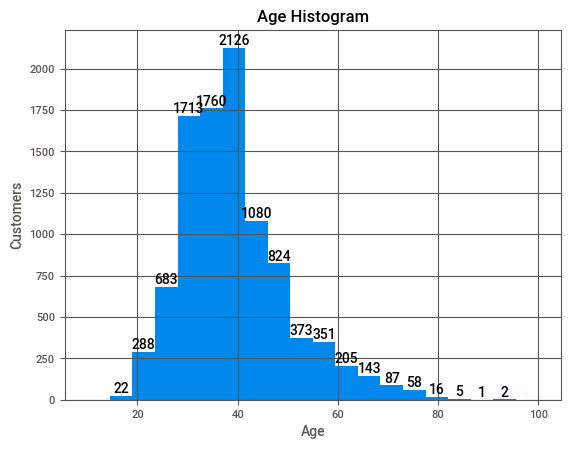

In [390]:
values, bins, _= plt.hist(churn["Age"], bins=20, range=(10,100))
#plt.hist(churn["Age"], bins=20, range=(10,100))
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Customers")
# I couldn't see the max point so I scale logarithmic to be able to see sparse points
# I would like to see the numbers as I browse so I am adding text
for i ,  val in enumerate(values):
    if val != 0:
            plt.text(bins[i] + (bins[i+1] -bins[i])/2, val, str(int(val)), ha="center", va="bottom")
plt.grid(True)
plt.show()

In [429]:
display_missing_values(churn, score_column='Age')

Missing Values
0             261

Missing Percentage (%)
0                2.610783

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                                     
15767954      Osborne        635.0   Germany  Female  NaN     3.0   81623.67   
15599195       Stiger        582.0   Germany    Male  NaN     1.0   88938.62   
15612350       Taylor        691.0    France  Female  NaN     5.0   40915.55   
15800703      Madukwe        485.0     Spain  Female  NaN     5.0  113157.22   
15755262     McDonald        608.0     Spain  Female  NaN     3.0   89763.84   
...               ...          ...       ...     ...  ...     ...        ...   
15712568       Angelo        515.0     Spain    Male  NaN    10.0  121355.99   
15744295          Hao        756.0    France    Male  NaN     1.0   94773.11   
15736371      Kennedy        633.0    France  Female  NaN     3.0  123034.43   
15719541    Flannagan        675.0     Spain    Male  NaN     2.0   90826.27   
15697606      Sturdee        637.0    France  Female  NaN    10.0  125712.20   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15767954              2.0        1.0             1.0        156791.36       0  
15599195              1.0        1.0             1.0         10054.53       0  
15612350              1.0        1.0             0.0        126213.84       1  
15800703              1.0        1.0             1.0         54141.50       0  
15755262              1.0        0.0             0.0        199304.74       1  
...                   ...        ...             ...              ...     ...  
15712568              1.0        1.0             0.0        138360.29       0  
15744295              1.0        1.0             0.0        114279.63       0  
15736371              2.0        1.0             1.0         38315.04       0  
15719541              2.0        1.0             0.0         60270.87       0  
15697606              1.0        0.0             0.0        175072.47       0  

[261 rows x 12 columns]

Number of missing values in 'Age' before filtering: 261
Rows with missing values in 'Age':


Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                                     
15767954      Osborne        635.0   Germany  Female  NaN     3.0   81623.67   
15599195       Stiger        582.0   Germany    Male  NaN     1.0   88938.62   
15612350       Taylor        691.0    France  Female  NaN     5.0   40915.55   
15800703      Madukwe        485.0     Spain  Female  NaN     5.0  113157.22   
15755262     McDonald        608.0     Spain  Female  NaN     3.0   89763.84   
...               ...          ...       ...     ...  ...     ...        ...   
15712568       Angelo        515.0     Spain    Male  NaN    10.0  121355.99   
15744295          Hao        756.0    France    Male  NaN     1.0   94773.11   
15736371      Kennedy        633.0    France  Female  NaN     3.0  123034.43   
15719541    Flannagan        675.0     Spain    Male  NaN     2.0   90826.27   
15697606      Sturdee        637.0    France  Female  NaN    10.0  125712.20   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15767954              2.0        1.0             1.0        156791.36       0  
15599195              1.0        1.0             1.0         10054.53       0  
15612350              1.0        1.0             0.0        126213.84       1  
15800703              1.0        1.0             1.0         54141.50       0  
15755262              1.0        0.0             0.0        199304.74       1  
...                   ...        ...             ...              ...     ...  
15712568              1.0        1.0             0.0        138360.29       0  
15744295              1.0        1.0             0.0        114279.63       0  
15736371              2.0        1.0             1.0         38315.04       0  
15719541              2.0        1.0             0.0         60270.87       0  
15697606              1.0        0.0             0.0        175072.47       0  

[261 rows x 12 columns]

Updated DataFrame shape: (9997, 12)
Number of missing values in 'Age' after filtering: 261
Rows with missing values in 'Age' after filtering:


Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                                     
15767954      Osborne        635.0   Germany  Female  NaN     3.0   81623.67   
15599195       Stiger        582.0   Germany    Male  NaN     1.0   88938.62   
15612350       Taylor        691.0    France  Female  NaN     5.0   40915.55   
15800703      Madukwe        485.0     Spain  Female  NaN     5.0  113157.22   
15755262     McDonald        608.0     Spain  Female  NaN     3.0   89763.84   
...               ...          ...       ...     ...  ...     ...        ...   
15712568       Angelo        515.0     Spain    Male  NaN    10.0  121355.99   
15744295          Hao        756.0    France    Male  NaN     1.0   94773.11   
15736371      Kennedy        633.0    France  Female  NaN     3.0  123034.43   
15719541    Flannagan        675.0     Spain    Male  NaN     2.0   90826.27   
15697606      Sturdee        637.0    France  Female  NaN    10.0  125712.20   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15767954              2.0        1.0             1.0        156791.36       0  
15599195              1.0        1.0             1.0         10054.53       0  
15612350              1.0        1.0             0.0        126213.84       1  
15800703              1.0        1.0             1.0         54141.50       0  
15755262              1.0        0.0             0.0        199304.74       1  
...                   ...        ...             ...              ...     ...  
15712568              1.0        1.0             0.0        138360.29       0  
15744295              1.0        1.0             0.0        114279.63       0  
15736371              2.0        1.0             1.0         38315.04       0  
15719541              2.0        1.0             0.0         60270.87       0  
15697606              1.0        0.0             0.0        175072.47       0  

[261 rows x 12 columns]

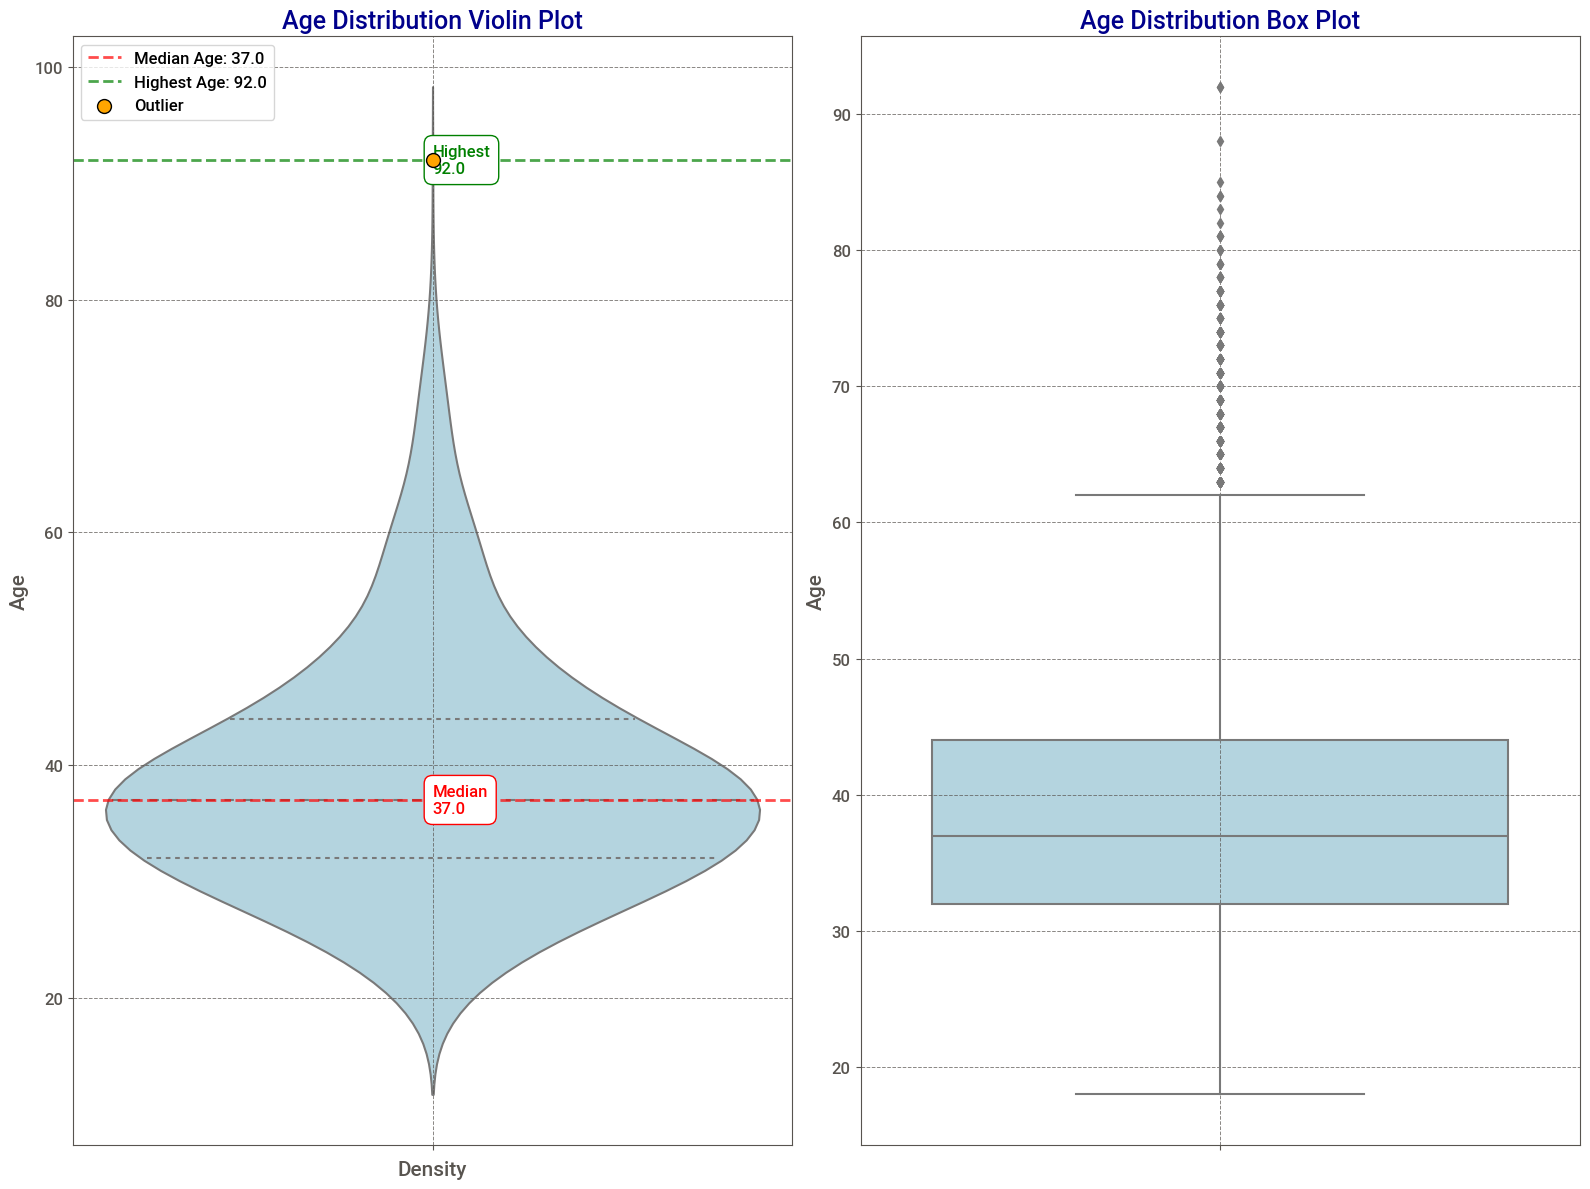

In [418]:
# Check for missing values in the 'Age' column
missing_age_before = churn['Age'].isna().sum()
print(f"Number of missing values in 'Age' before filtering: {missing_age_before}")

# Display rows with missing values in the 'Age' column
print("Rows with missing values in 'Age':")
display(churn[churn['Age'].isna()])

# Remove rows with negative values in 'Age' or keep missing values
churn = churn[(churn['Age'] >= 0) | (churn['Age'].isna())]

# Display the updated DataFrame shape
print(f"Updated DataFrame shape: {churn.shape}")

# Check for missing values in the 'Age' column after filtering
missing_age_after = churn['Age'].isna().sum()
print(f"Number of missing values in 'Age' after filtering: {missing_age_after}")

# Display rows with missing values in the 'Age' column after filtering
print("Rows with missing values in 'Age' after filtering:")
display(churn[churn['Age'].isna()])

# Call the function to plot credit score distributions
plot_distributions(churn, 'Age')

**Age Distribution**: The age distribution is approximately Gaussian, with a skew towards younger customers.


**Key Age Group**: The predominant age group is between 27 and 42 years old. Median is 37 and 75% of the people have age 44 or less. 


**Older and Younger Customers**: There are very few customers in the 80 to 100 and under 20 age ranges. The 60 to 80 age range shows a lower number of customers, which warrants further investigation. We have outliers from 62 above and under 18 which slightly effects the average line.

In [391]:
# Filter age groups
under_20 = churn[churn['Age'] < 20]
between_60_and_80 = churn[(churn['Age'] >= 60) & (churn['Age'] <= 80)]
above_80 = churn[churn['Age'] > 80]

# Display the filtered dataframes with titles
def display_table(title, df):
    display(Markdown(f"### **{title} ({len(df)} rows)**"))
    display(df)

# Display the tables
display_table("Customers Under 20", under_20)
display_table("Customers Between 60 and 80", between_60_and_80)
display_table("Customers Above 80", above_80)

### **Customers Under 20 (50 rows)**

Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                                 
15647091           Endrizzi        725.0   Germany    Male  19.0     0.0   
15787619              Hsieh        844.0    France    Male  18.0     2.0   
15601026          Gallagher        572.0   Germany  Female  19.0     1.0   
15696637               Sung        571.0    France  Female -23.0    10.0   
15770309           McDonald        656.0    France    Male  18.0    10.0   
15569178          Kharlamov        570.0    France  Female  18.0     4.0   
15795519           Vasiliev        716.0   Germany  Female  18.0     3.0   
15621893           Bellucci        727.0    France    Male  18.0     4.0   
15758372            Wallace        674.0    France    Male  18.0     7.0   
15664639           McGregor        645.0    France    Male  19.0     9.0   
15693947           Tokareva        614.0    France     NaN  19.0     5.0   
15809823           Thurgood        491.0   Germany    Male  19.0     2.0   
15680243              Brown        792.0    France    Male  19.0     7.0   
15776844                Hao        762.0     Spain  Female  19.0     6.0   
15654296            Estrada        754.0     Spain  Female  19.0     9.0   
15657439               Chao        738.0    France    Male  18.0     4.0   
15657779             Boylan        806.0     Spain    Male  18.0     3.0   
15757821            Burgess        771.0     Spain    Male  18.0     1.0   
15794841               Kung        739.0     Spain    Male  19.0     5.0   
15665327           Cattaneo        706.0    France    Male  18.0     2.0   
15665062           Lucchese        696.0    France    Male  19.0     1.0   
15782418                 Ku        589.0   Germany  Female  19.0     9.0   
15666652          Anayolisa        781.0    France  Female  19.0     3.0   
15796231            Nwankwo        681.0    France  Female  18.0     1.0   
15805764           Hallahan        646.0    France    Male  18.0    10.0   
15641822             Barese        648.0    France  Female  19.0     1.0   
15761506            Russell        615.0     Spain    Male  19.0     5.0   
15809991            Ferrari        756.0     Spain    Male  19.0     4.0   
15741195          Okechukwu        613.0     Spain     NaN  19.0     5.0   
15670343                 Li        576.0     Spain    Male  19.0     6.0   
15615245               Shao        660.0    France    Male  19.0     5.0   
15693902               Hunt        597.0    France    Male  19.0     2.0   
15768340            Beavers        642.0   Germany  Female  19.0     3.0   
15662641              Amadi        850.0    France    Male  19.0     8.0   
15759133            Vaguine        616.0    France    Male  18.0     6.0   
15689692             Walker        598.0   Germany    Male  19.0     3.0   
15570086              Lynch        684.0   Germany    Male  18.0     9.0   
15619892               Page        644.0     Spain    Male  18.0     8.0   
15732967          Cremonesi        731.0    France    Male  19.0     6.0   
15770968             Leason        741.0   Germany  Female  19.0     8.0   
15722701              Bruno        594.0   Germany    Male  18.0     1.0   
15659305            Webster        605.0   Germany    Male  19.0     8.0   
15634146                Hou        835.0   Germany    Male  18.0     2.0   
15673180        Onyekaozulu        727.0   Germany  Female  18.0     2.0   
15665521    Chiazagomekpele        642.0   Germany    Male  18.0     5.0   
15641688            Collier        644.0     Spain    Male  18.0     7.0   
15605067       Nwachinemelu        472.0    France    Male  19.0     9.0   
15728829             Weigel        509.0    France     NaN  18.0     7.0   
15680430        Ajuluchukwu        601.0   Germany  Female -49.0     4.0   
15813451    Fleetwood-Smith        677.0     Spain    Male  18.0     8.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \


### **Customers Between 60 and 80 (505 rows)**

Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                             
15687946        Osborne        556.0    France  Female  61.0     2.0   
15684171        Bianchi        660.0     Spain  Female  61.0     5.0   
15623944          T'ien        511.0     Spain  Female  66.0     4.0   
15805254        Ndukaku        652.0     Spain  Female  75.0    10.0   
15804919       Dunbabin        670.0     Spain  Female  65.0     1.0   
...                 ...          ...       ...     ...   ...     ...   
15814690    Chukwujekwu        595.0   Germany  Female  64.0     2.0   
15669414         Pisano        486.0   Germany    Male  62.0     9.0   
15704795          Vagin        521.0    France  Female  77.0     6.0   
15810563             Ho        678.0     Spain  Female  61.0     8.0   
15653037          Parks        609.0    France    Male  77.0     1.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                        
15687946    117419.35            1.0        1.0             1.0   
15684171    155931.11            1.0        1.0             1.0   
15623944         0.00            1.0        1.0             0.0   
15805254         0.00            2.0        1.0             1.0   
15804919         0.00            1.0        1.0             1.0   
...               ...            ...        ...             ...   
15814690    105736.32            1.0        1.0             1.0   
15669414    118356.89            2.0        1.0             0.0   
15704795         0.00            2.0        1.0             1.0   
15810563         0.00            2.0        1.0             1.0   
15653037         0.00            1.0        0.0             1.0   

            EstimatedSalary  Exited  
CustomerId                           
15687946           94153.83       0  
15684171          158338.39       0  
15623944            1643.11       1  
15805254          114675.75       0  
15804919          177655.68       1  
...                     ...     ...  
15814690           89935.73       1  
15669414          168034.83       1  
15704795           49054.10       0  
15810563          159938.82       0  
15653037           18708.76       0  

[505 rows x 12 columns]

### **Customers Above 80 (12 rows)**

Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                            
15810864    Williamson        700.0    France  Female  82.0     2.0   
15813303       Rearick        513.0     Spain    Male  88.0    10.0   
15578006           Yao        787.0    France  Female  85.0    10.0   
15798024          Lori        537.0   Germany    Male  84.0     8.0   
15653251        Hickey        408.0    France  Female  84.0     8.0   
15772341           NaN        682.0   Germany    Male  81.0     6.0   
15764927        Rogova        753.0    France    Male  92.0     3.0   
15660878         T'ien        705.0    France    Male  92.0     1.0   
15800554         Perry        850.0    France  Female  81.0     1.0   
15731569        Hudson        850.0    France    Male  81.0     5.0   
15620443    Fiorentino        711.0    France  Female  81.0     6.0   
15621644      Lombardi        678.0   Germany    Male  83.0     6.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                        
15810864         0.00            2.0        0.0             1.0   
15813303         0.00            2.0        1.0             1.0   
15578006         0.00            2.0        1.0             1.0   
15798024     92242.34            1.0        1.0             1.0   
15653251     87873.39            1.0        0.0             0.0   
15772341    122029.15            1.0        1.0             1.0   
15764927    121513.31            1.0        0.0             1.0   
15660878    126076.24            2.0        1.0             1.0   
15800554         0.00            2.0        1.0             1.0   
15731569         0.00            2.0        1.0             1.0   
15620443         0.00            2.0        1.0             1.0   
15621644    123356.63            1.0        0.0             1.0   

            EstimatedSalary  Exited  
CustomerId                           
15810864          182055.36       0  
15813303           52952.24       0  
15578006          116537.96       0  
15798024          186235.98       0  
15653251          188484.52       1  
15772341           50783.88       0  
15764927          195563.99       0  
15660878           34436.83       0  
15800554           59568.24       0  
15731569           44827.47       0  
15620443           72276.24       0  
15621644           92934.41       0

There are negative values for age which need to be treated.

In [392]:

# Identify and remove rows with negative age values
invalid_ages = churn[churn['Age'] < 0]

# Log the invalid ages
print("Rows with invalid age values (negative):")
display(invalid_ages)

Rows with invalid age values (negative):


Surname  CreditScore Geography  Gender   Age  Tenure  \
CustomerId                                                             
15696637           Sung        571.0    France  Female -23.0    10.0   
15680430    Ajuluchukwu        601.0   Germany  Female -49.0     4.0   

              Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                        
15696637    151097.28            1.0        0.0             1.0   
15680430     96252.98            2.0        1.0             NaN   

            EstimatedSalary  Exited  
CustomerId                           
15696637           17163.75       0  
15680430          104263.82       0

As there are only 2 negative ages, I remove them as errors.

In [393]:

# Remove rows with negative age values but keep NaNs
churn = churn[churn['Age'].isna() | (churn['Age'] >= 0)]
# Identify and remove rows with negative age values
invalid_ages = churn[churn['Age'] < 0]

# Log the invalid ages
print("Rows with invalid age values (negative):")
display(invalid_ages)

Rows with invalid age values (negative):


Empty DataFrame
Columns: [Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

Overall, customers above 80 years old are only 12, which is a small number, and we can consider removing them. Additionally, customers under 20 years old total 48, which is also relatively small. In contrast, customers between 60 and 80 years old amount to 505, representing a significant portion of our dataset. We should consider these age groups carefully when deciding how to handle outliers. Let's see the missing values:

In [394]:
# Filter rows where 'Age' is missing
missing_age_rows = churn[churn["Age"].isna()]

# Display the rows with missing 'Age' values
display(missing_age_rows)

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                                     
15767954      Osborne        635.0   Germany  Female  NaN     3.0   81623.67   
15599195       Stiger        582.0   Germany    Male  NaN     1.0   88938.62   
15612350       Taylor        691.0    France  Female  NaN     5.0   40915.55   
15800703      Madukwe        485.0     Spain  Female  NaN     5.0  113157.22   
15755262     McDonald        608.0     Spain  Female  NaN     3.0   89763.84   
...               ...          ...       ...     ...  ...     ...        ...   
15712568       Angelo        515.0     Spain    Male  NaN    10.0  121355.99   
15744295          Hao        756.0    France    Male  NaN     1.0   94773.11   
15736371      Kennedy        633.0    France  Female  NaN     3.0  123034.43   
15719541    Flannagan        675.0     Spain    Male  NaN     2.0   90826.27   
15697606      Sturdee        637.0    France  Female  NaN    10.0  125712.20   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15767954              2.0        1.0             1.0        156791.36       0  
15599195              1.0        1.0             1.0         10054.53       0  
15612350              1.0        1.0             0.0        126213.84       1  
15800703              1.0        1.0             1.0         54141.50       0  
15755262              1.0        0.0             0.0        199304.74       1  
...                   ...        ...             ...              ...     ...  
15712568              1.0        1.0             0.0        138360.29       0  
15744295              1.0        1.0             0.0        114279.63       0  
15736371              2.0        1.0             1.0         38315.04       0  
15719541              2.0        1.0             0.0         60270.87       0  
15697606              1.0        0.0             0.0        175072.47       0  

[261 rows x 12 columns]

There are 261 missing values for age feature. To avoid losing context and to make better decisions on handling outliers, I will treat them after performing multivariate analysis. Additionally, I will categorize age groups, as each group exhibits different behaviors. Now, let's move on to tenure:

#### **Tenure**

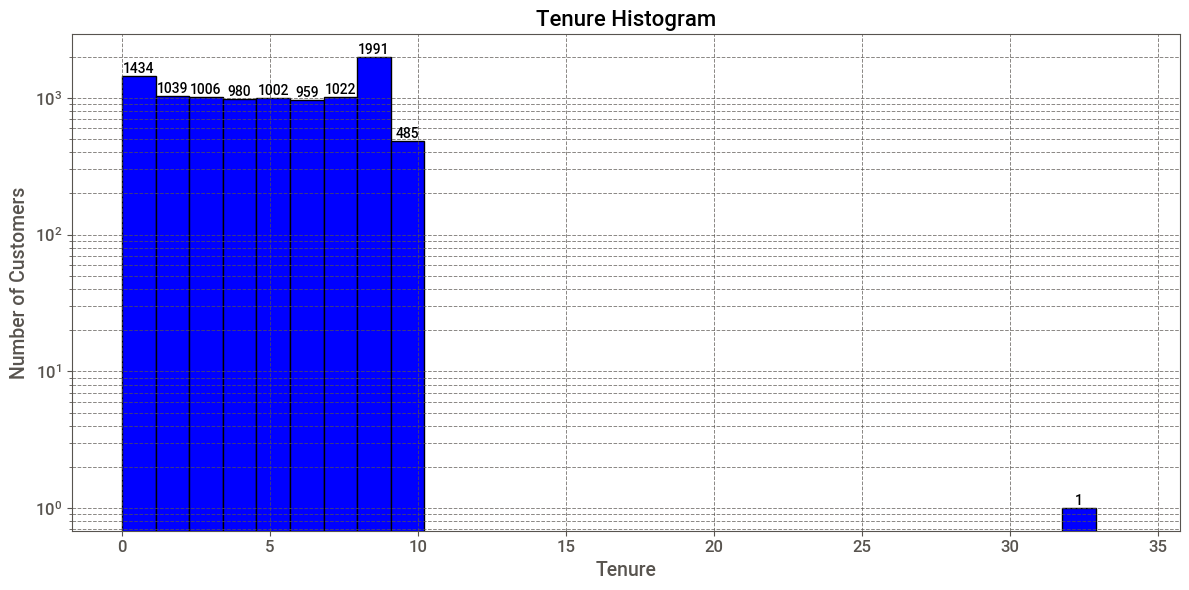

In [395]:
# Plot histogram for Tenure
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Plot histogram
values, bins, _ = plt.hist(churn["Tenure"], bins=30, range=(0, churn["Tenure"].max() + 2), color='blue', edgecolor='black')

# Add a title and labels
plt.title("Tenure Histogram", fontsize=16, fontweight='bold')  # title with bold font
plt.xlabel("Tenure", fontsize=14, fontweight='bold')  # x-axis label with bold font
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold')  # Larger y-axis label with bold font

# Logarithmic scale for y-axis to better visualize sparse points
plt.yscale('log')

# Add text annotations for each bar
for i, val in enumerate(values):
    if val > 0:  # Only annotate non-zero values
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, val, str(int(val)), ha="center", va="bottom", fontsize=10, color='black')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add tick labels with larger font for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

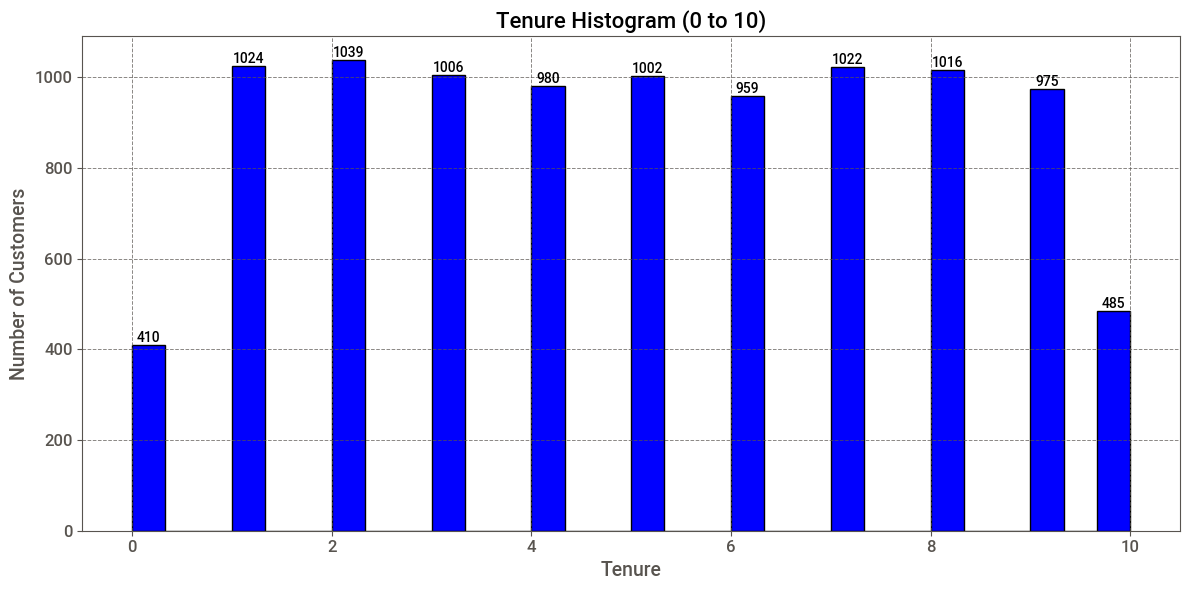

In [396]:
# Plot histogram for Tenure focusing on a specific range
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Plot histogram
values, bins, _ = plt.hist(churn["Tenure"], bins=30, range=(0, 10), color='blue', edgecolor='black')

# Add a title and labels
plt.title("Tenure Histogram (0 to 10)", fontsize=16, fontweight='bold')  # Title with bold font
plt.xlabel("Tenure", fontsize=14, fontweight='bold')  # X-axis label with bold font
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold')  # Y-axis label with bold font

# Add text annotations for each bar
for i, val in enumerate(values):
    if val > 0:  # Only annotate non-zero values
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, val, str(int(val)), ha="center", va="bottom", fontsize=10, color='black')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add tick labels with larger font for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


Most of the values are between 0 and 10. there are outliers one extreme outlier. Let's inspect the outliers:

In [397]:
df = churn[churn["Tenure"] > 10]
df

Surname  CreditScore Geography  Gender   Age     Tenure  Balance  \
CustomerId                                                                     
15704231    Barrett        430.0    France  Female  33.0  32.044103      0.0   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15704231              1.0        1.0             1.0         69759.91       0

As shown in the dataframe we have one customer with tenure 32.044 which seems an error as it is the only fractional tenure. So when treating outliers I am going to delete this row but first I am going to analyze the context. 

In [398]:
# Identify rows with fractional Tenure values
fractional_tenure = churn[churn['Tenure'].notna() & churn['Tenure'] % 1 != 0]


def display_table(title, df):
    display(Markdown(f"#### **{title} ({len(df)} rows)**"))
    display(df)

# Show the rows with fractional values
display_table("Fractional Tenure Values", fractional_tenure)

#### **Fractional Tenure Values (1 rows)**

Surname  CreditScore Geography  Gender   Age     Tenure  Balance  \
CustomerId                                                                     
15704231    Barrett        430.0    France  Female  33.0  32.044103      0.0   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15704231              1.0        1.0             1.0         69759.91       0

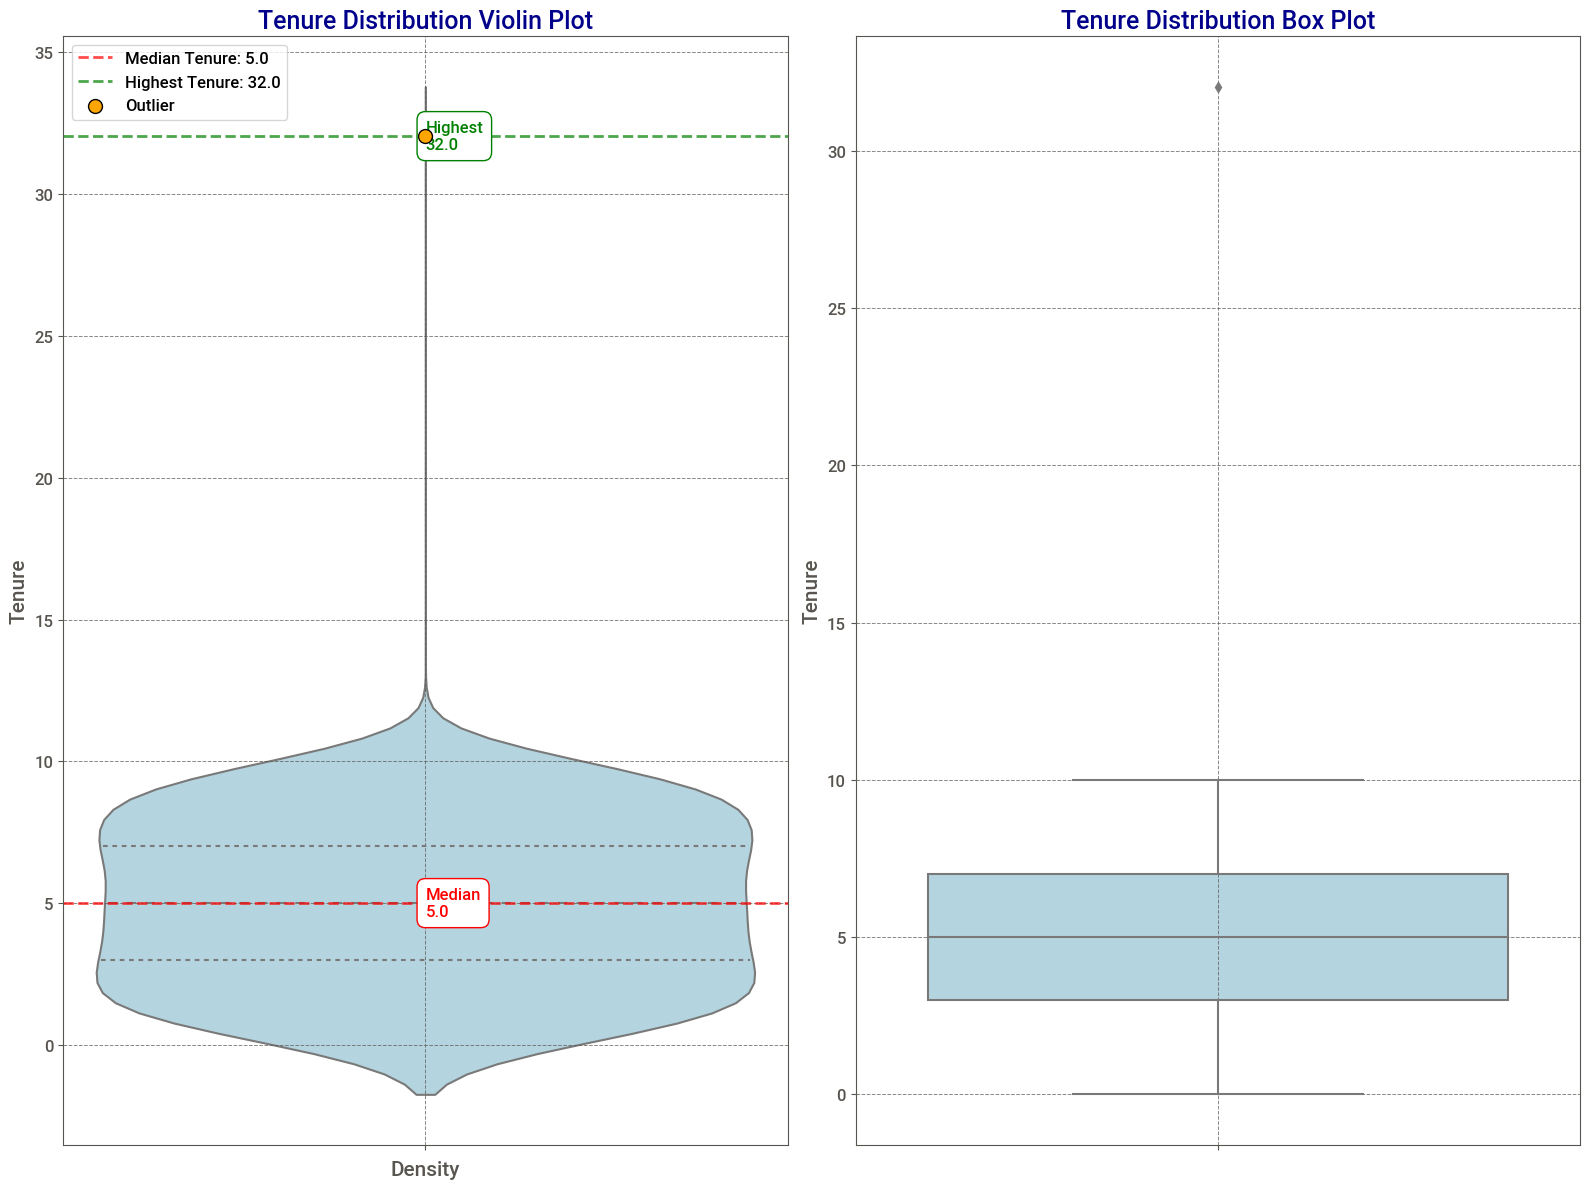

In [419]:
# Call the function to plot credit score distributions
plot_distributions(churn, 'Tenure')


We can see that median and averge are the same so the outliers dosnt have that much effect on the distribution however there is an error in the data with negative value for tenure. Let's see how to treat this.

In [400]:
# Filter rows with negative tenure
negative_tenure = churn[churn['Tenure'] < 0]

# Display the rows with negative tenure
display(negative_tenure)

Surname  CreditScore Geography Gender   Age  Tenure    Balance  \
CustomerId                                                                     
15657540    Cremonesi        578.0    France   Male  50.0    -5.0  151215.34   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15657540              2.0        1.0             0.0         169804.4       0

It can be either an error in the sign or a total error. As this is only one entry we should delete the row

In [401]:
display(churn)
# Keep missing values and values greater than or equal to 0
churn = churn[(churn['Tenure'] >= 0) | (churn['Tenure'].isna())]

# Display the updated DataFrame
display(churn)

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15634602     Hargrave        619.0    France  Female  42.0     2.0       0.00   
15647311         Hill        608.0     Spain  Female  41.0     1.0   83807.86   
15619304         Onio        502.0    France  Female  42.0     8.0  159660.80   
15701354         Boni        699.0    France  Female  39.0     1.0       0.00   
15737888     Mitchell        850.0     Spain  Female  43.0     2.0  125510.82   
...               ...          ...       ...     ...   ...     ...        ...   
15606229     Obijiaku        771.0    France    Male  39.0     5.0       0.00   
15569892    Johnstone        516.0    France    Male  35.0    10.0   57369.61   
15584532          Liu        709.0    France  Female  36.0     7.0       0.00   
15682355    Sabbatini        772.0   Germany    Male  42.0     3.0   75075.31   
15628319       Walker        792.0    France  Female  28.0     4.0  130142.79   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15634602              1.0        1.0             1.0        101348.88       1  
15647311              1.0        0.0             1.0        112542.58       0  
15619304              3.0        1.0             0.0        113931.57       1  
15701354              2.0        0.0             NaN         93826.63       0  
15737888              1.0        1.0             1.0         79084.10       0  
...                   ...        ...             ...              ...     ...  
15606229              2.0        1.0             0.0         96270.64       0  
15569892              1.0        1.0             1.0        101699.77       0  
15584532              1.0        0.0             1.0         42085.58       1  
15682355              2.0        1.0             0.0         92888.52       1  
15628319              1.0        1.0             0.0         38190.78       0  

[9998 rows x 12 columns]

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15634602     Hargrave        619.0    France  Female  42.0     2.0       0.00   
15647311         Hill        608.0     Spain  Female  41.0     1.0   83807.86   
15619304         Onio        502.0    France  Female  42.0     8.0  159660.80   
15701354         Boni        699.0    France  Female  39.0     1.0       0.00   
15737888     Mitchell        850.0     Spain  Female  43.0     2.0  125510.82   
...               ...          ...       ...     ...   ...     ...        ...   
15606229     Obijiaku        771.0    France    Male  39.0     5.0       0.00   
15569892    Johnstone        516.0    France    Male  35.0    10.0   57369.61   
15584532          Liu        709.0    France  Female  36.0     7.0       0.00   
15682355    Sabbatini        772.0   Germany    Male  42.0     3.0   75075.31   
15628319       Walker        792.0    France  Female  28.0     4.0  130142.79   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15634602              1.0        1.0             1.0        101348.88       1  
15647311              1.0        0.0             1.0        112542.58       0  
15619304              3.0        1.0             0.0        113931.57       1  
15701354              2.0        0.0             NaN         93826.63       0  
15737888              1.0        1.0             1.0         79084.10       0  
...                   ...        ...             ...              ...     ...  
15606229              2.0        1.0             0.0         96270.64       0  
15569892              1.0        1.0             1.0        101699.77       0  
15584532              1.0        0.0             1.0         42085.58       1  
15682355              2.0        1.0             0.0         92888.52       1  
15628319              1.0        1.0             0.0         38190.78       0  

[9997 rows x 12 columns]

In [430]:
display_missing_values(churn, score_column='Tenure')

Missing Values
0              78

Missing Percentage (%)
0                0.780234

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15771573      Okagbue        637.0   Germany  Female  39.0     NaN  137843.80   
15789484      Hammond        751.0   Germany  Female  36.0     NaN  169831.46   
15627360       Fuller        432.0    France    Male  42.0     NaN  152603.45   
15585388      Sherman        660.0   Germany    Male  31.0     NaN  125189.75   
15684181      Hackett        643.0    France    Male  45.0     NaN       0.00   
...               ...          ...       ...     ...   ...     ...        ...   
15609804         Hyde        688.0    France    Male  29.0     NaN       0.00   
15659710    Lascelles        581.0    France    Male  25.0     NaN   77886.53   
15620577         Wood        715.0    France    Male  45.0     NaN       0.00   
15590177    Chiedozie        718.0       NaN  Female  44.0     NaN  133866.22   
15786789           Ni        725.0    France  Female  29.0     NaN       0.00   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15771573              1.0        1.0             1.0        117622.80       1  
15789484              2.0        1.0             1.0         27758.36       0  
15627360              1.0        1.0             0.0        110265.24       1  
15585388              2.0        1.0             1.0        139874.43       0  
15684181              1.0        1.0             0.0        142513.50       1  
...                   ...        ...             ...              ...     ...  
15609804              2.0        1.0             0.0        154695.57       0  
15659710              2.0        1.0             0.0        150319.49       0  
15620577              2.0        1.0             1.0         55043.93       0  
15590177              1.0        0.0             1.0        139049.24       0  
15786789              2.0        1.0             1.0        190776.83       0  

[78 rows x 12 columns]

The error is deleted and there are also missing values in the tenure let´s look at them

In [404]:
display(churn[churn['Tenure'].isna()])

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                                      
15771573      Okagbue        637.0   Germany  Female  39.0     NaN  137843.80   
15789484      Hammond        751.0   Germany  Female  36.0     NaN  169831.46   
15627360       Fuller        432.0    France    Male  42.0     NaN  152603.45   
15585388      Sherman        660.0   Germany    Male  31.0     NaN  125189.75   
15684181      Hackett        643.0    France    Male  45.0     NaN       0.00   
...               ...          ...       ...     ...   ...     ...        ...   
15609804         Hyde        688.0    France    Male  29.0     NaN       0.00   
15659710    Lascelles        581.0    France    Male  25.0     NaN   77886.53   
15620577         Wood        715.0    France    Male  45.0     NaN       0.00   
15590177    Chiedozie        718.0       NaN  Female  44.0     NaN  133866.22   
15786789           Ni        725.0    France  Female  29.0     NaN       0.00   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15771573              1.0        1.0             1.0        117622.80       1  
15789484              2.0        1.0             1.0         27758.36       0  
15627360              1.0        1.0             0.0        110265.24       1  
15585388              2.0        1.0             1.0        139874.43       0  
15684181              1.0        1.0             0.0        142513.50       1  
...                   ...        ...             ...              ...     ...  
15609804              2.0        1.0             0.0        154695.57       0  
15659710              2.0        1.0             0.0        150319.49       0  
15620577              2.0        1.0             1.0         55043.93       0  
15590177              1.0        0.0             1.0        139049.24       0  
15786789              2.0        1.0             1.0        190776.83       0  

[78 rows x 12 columns]

There are 78 missing values in tenure and we should decide on how to handle them later that we have the whole picture of the data. Now that we analyzed the tenure let's move to the next column which is balance:

#### **Balance**

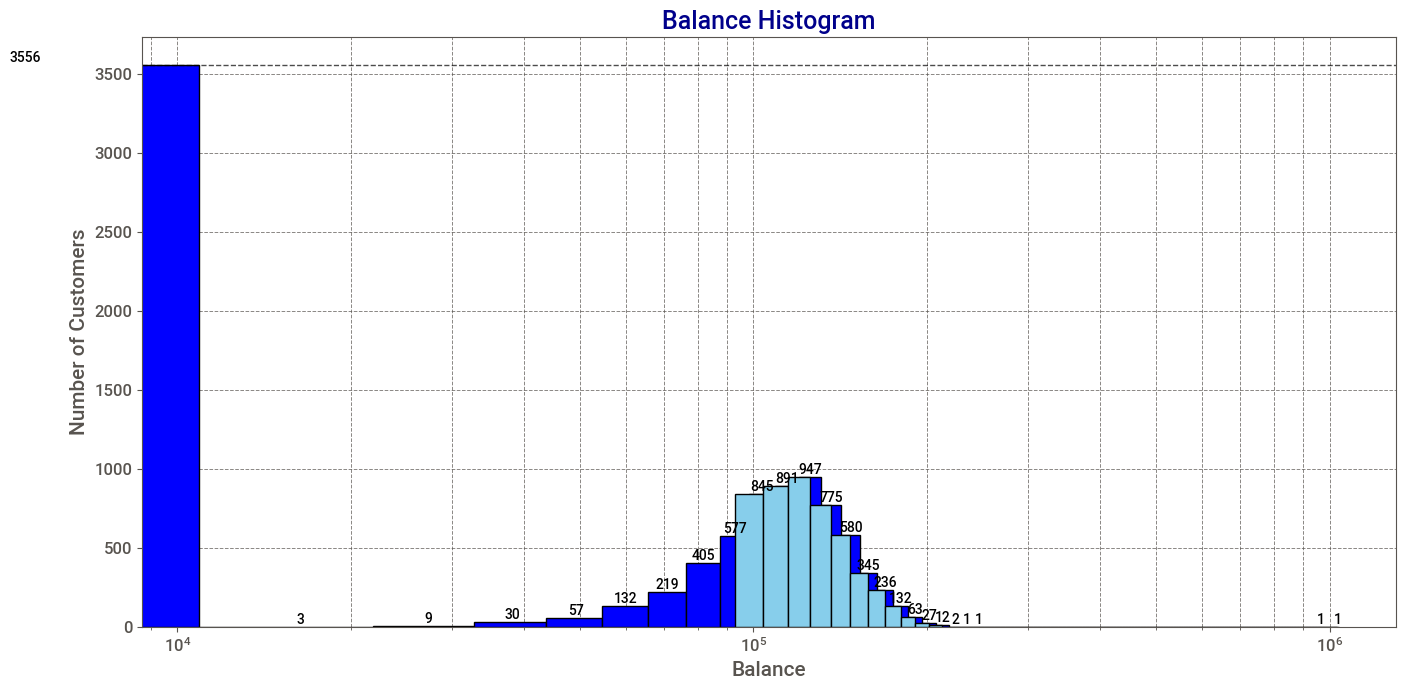

In [402]:
# Set figure size for better readability
plt.figure(figsize=(14, 7))  # Increased size for better clarity

# Plot histogram
values, bins, _ = plt.hist(churn["Balance"], bins=95, range=(0, churn["Balance"].max() + 2), color='blue', edgecolor='black')

# Add a title and labels
plt.title("Balance Histogram", fontsize=18, fontweight='bold', color='darkblue')  # Title with larger font, bold, and color
plt.xlabel("Balance", fontsize=15, fontweight='bold')  # X-axis label with larger font and bold
plt.ylabel("Number of Customers", fontsize=15, fontweight='bold')  # Y-axis label with larger font and bold

# Set logarithmic scale for x-axis to better visualize sparse points
plt.xscale("log")

# Add text annotations for each bar
for i, val in enumerate(values):
    if val > 0:  # Only annotate non-zero values
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, val, str(int(val)), ha="center", va="bottom", fontsize=10, color='black')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a horizontal line at the top of the bars for a more distinct look
plt.gca().set_axisbelow(True)  # Ensure gridlines are behind the bars
plt.axhline(y=max(values), color='black', linestyle='--', linewidth=1, alpha=0.7)  # Horizontal line at the max bar height

# Highlight high-value outliers with a different color
for i in range(len(bins)-1):
    if bins[i+1] > 100000:  # Example threshold for high-value outliers
        plt.bar(bins[i], values[i], width=(bins[i+1] - bins[i]), color='skyblue', edgecolor='black')

# Add tick labels with larger font for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


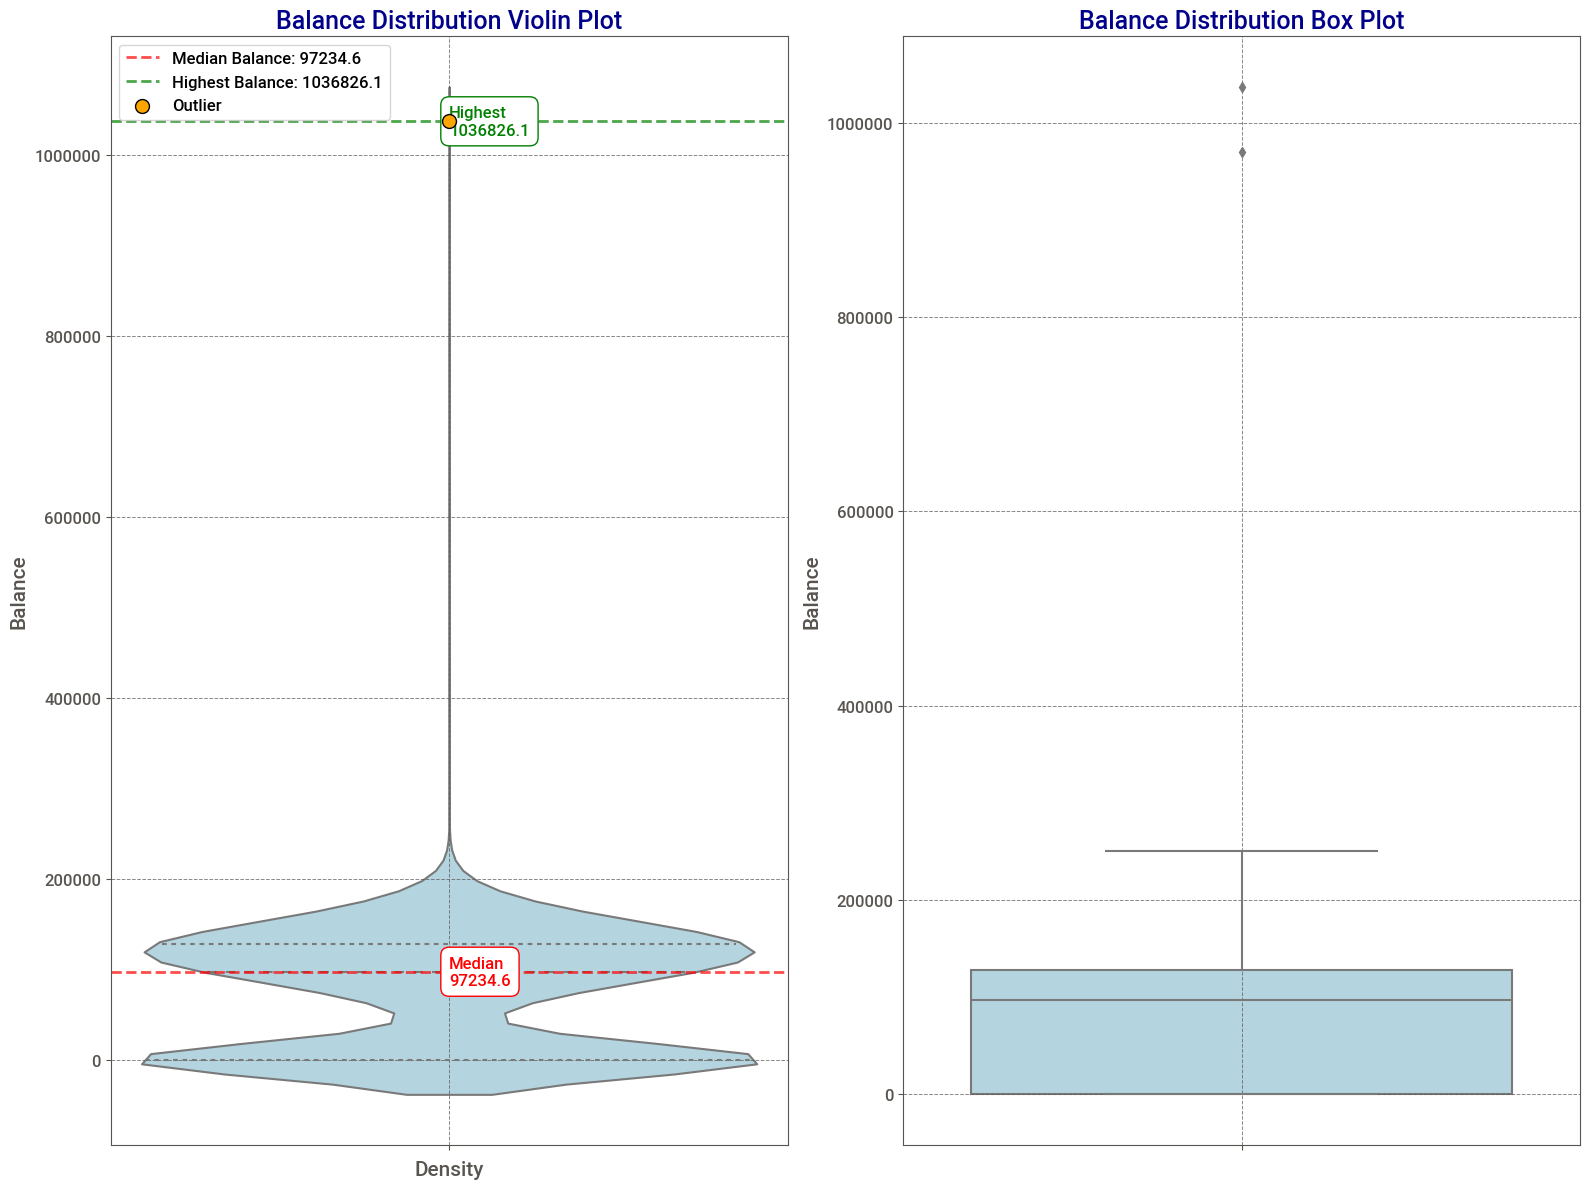

In [420]:
# Call the function to plot credit score distributions
plot_distributions(churn, 'Balance')

We can see that the median is 97246 dollars while the max is 1,036,826 dollars which is way above the median.We have 2 outliers that effects the whole average so we have to treat them later either delete or capping them to max in interquartile range (IQ3).

In [431]:
display_missing_values(churn, score_column='Balance')

Missing Values
0             150

Missing Percentage (%)
0                 1.50045

Surname  CreditScore Geography  Gender   Age  Tenure  Balance  \
CustomerId                                                                     
15661507       Muldrow        587.0     Spain    Male  45.0     6.0      NaN   
15788448        Watson        490.0     Spain    Male  31.0     3.0      NaN   
15641582       Chibugo        735.0   Germany    Male  43.0    10.0      NaN   
15731511       Ritchie        808.0    France    Male  45.0     7.0      NaN   
15576269       Madison        523.0     Spain    Male  34.0     7.0      NaN   
...                ...          ...       ...     ...   ...     ...      ...   
15792232          Moss        595.0     Spain  Female  43.0     5.0      NaN   
15592104          Lane        655.0    France  Female  41.0     5.0      NaN   
15795488     Beneventi        773.0     Spain    Male  52.0     2.0      NaN   
15709256        Glover        850.0    France  Female   NaN     9.0      NaN   
15735799    Maconochie        527.0   Germany    Male  58.0     3.0      NaN   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15661507              1.0        0.0             0.0        158684.81       0  
15788448              1.0        0.0             1.0        114066.77       0  
15641582              2.0        1.0             1.0        196673.28       0  
15731511              2.0        1.0             0.0        147132.46       0  
15576269              2.0        1.0             0.0         62030.06       0  
...                   ...        ...             ...              ...     ...  
15792232              2.0        0.0             0.0        105149.80       0  
15592104              1.0        0.0             0.0         36548.00       1  
15795488              2.0        1.0             0.0         57337.79       0  
15709256              2.0        1.0             1.0        164864.67       0  
15735799              1.0        1.0             1.0        126144.96       0  

[150 rows x 12 columns]

#### **Number of Products**

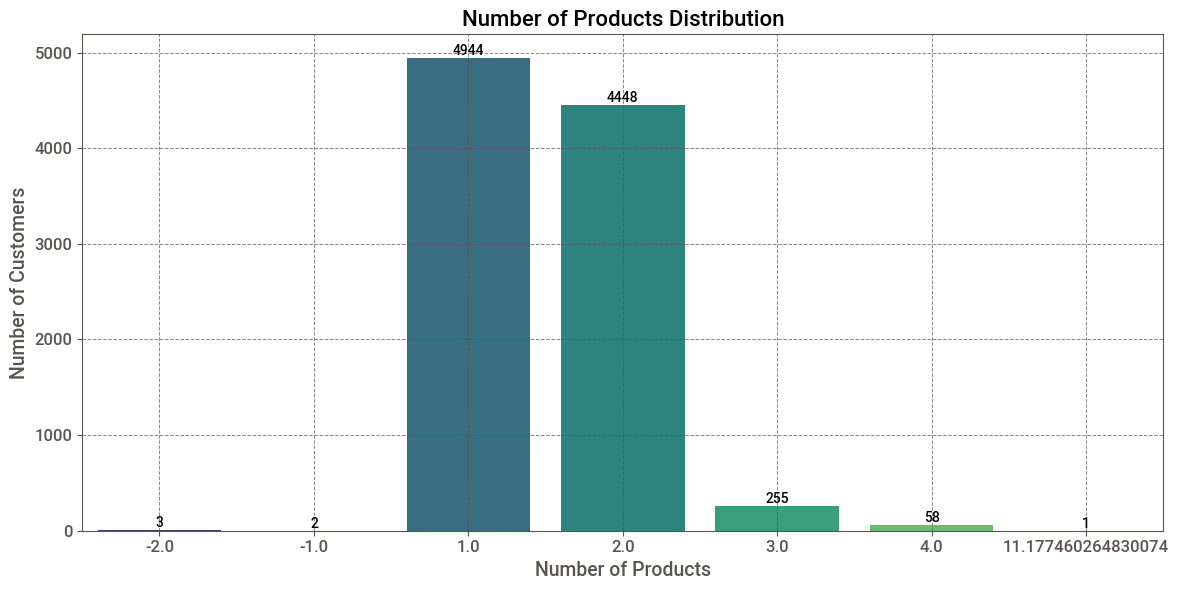

In [436]:
# Set figure size for better readability
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Count the number of customers for each number of products
num_products_counts = churn["NumOfProducts"].value_counts().sort_index()

# Plot the vertical bar chart
sns.barplot(x=num_products_counts.index, y=num_products_counts.values, palette='viridis')

# Add a title and labels
plt.title("Number of Products Distribution", fontsize=16, fontweight='bold')  # Title with bold font
plt.xlabel("Number of Products", fontsize=14, fontweight='bold')  # X-axis label with bold font
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold')  # Y-axis label with bold font

# Add text annotations for each bar
for i, value in enumerate(num_products_counts.values):
    plt.text(x=i, y=value, s=str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add tick labels with larger font for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to make room for labels
plt.tight_layout()

# Show plot
plt.show()


We can see error in number of products 3 are -2, 2 are -1 and 1 is 11.177.. which is an error. So let's inspect: